In [108]:
%run functions.ipynb

Ready: 2023-04-26 23:42:04


# Введение

In [326]:
def make_hse_image(df, output_file_name=None, cols_without_color=[0], dedup_cols=None, col_width=1.0, row_height=0.625, font_size=28,
                     header_color='#249FD8', row_colors=['#D2DDF1', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, show=False, **kwargs):
    rating_col = df.columns[-1]
    data = df.sort_values(rating_col, ascending=False)
    data_separeted_numbers = data.copy()
    for col in data.columns[1:]:
        data_separeted_numbers[col] = data[col].apply(make_sep)
        if col in ['Пользователи, %', 'Запросы, %', 'Запросов на пользователя,\nитого']:
            data_separeted_numbers[col] = data[col].apply(lambda x: str(x).replace('.',','))
        
    if ax is None:
        size = (np.array([6.3*4, 3.94*4]))
        fig, ax = plt.subplots(figsize=size, dpi=2**8)
        ax.axis('off')

    mpl_table = ax.table(cellText=data_separeted_numbers.values, bbox=bbox, colLabels=data.columns, colLoc='center', loc='bottom')
    mpl_table.auto_set_font_size(False)
    cells_dict = dict(six.iteritems(mpl_table._cells))
    
    #im = plt.imread(r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\Лого_2ГИС_230401_1600.png")
    #ax.figure.figimage(im, 43, 44, zorder=1, alpha=0.5)
#
    #im = plt.imread(r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\лого_ШТ_230401_1600.png")
    #ax.figure.figimage(im, 43, 1068, zorder=1, alpha=0.5)
    
    fpath = Path(mpl.get_data_path(), r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\arialnarrow.ttf")
    colors_dict = colorize_column(df, cols_not_to_color=cols_without_color)
    colors_dict.update(colorize_column(data, cols_not_to_color=list(range(data.shape[1]-1))), filter_zero=True)
    colors = ([color_list_full[i] for i in range(0, len(color_list_full), len(color_list_full) % 15)] + [color_list_full[-1]]) 
    
    im = plt.imread(r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\01_Logo_HSE_full_rus_PANTONE_for_dark_2.png")
    ax.figure.figimage(im, 100, 2800, zorder=1, alpha=1)

    for k in sorted(cells_dict.keys()): #k[0] - строка, k[1] - столбец
        cell = cells_dict[k]
        cell.set_edgecolor(edge_color)
        row_index = k[0]
        column_index = k[1]
        
        # Высота и цвет заголовков
        if row_index == 0:
            rotation='horizontal' if k == (0,0) else 'vertical' 
            cell.set_text_props(color='w', rotation=rotation, ha='center')
            cell.set_facecolor(header_color)
            cell.set_height(0.05)
            
        # Высота и цвет остальных строк
        else:
            ha = 'left' if column_index ==0 else 'right'
            cell.set_facecolor(row_colors[k[0]%len(row_colors)])
            cell.set_height(0.008)
            cell.set_text_props(wrap=True, ha=ha)
        
        # Ширина столбцов
        if column_index == 0:
            cell.set_width(0.006)
        elif column_index == 6:
            cell.set_width(0.0008)
        else:
            cell.set_width(0.0016)
                        
        # Цветвоая шкала
        if row_index > 0 and column_index not in cols_without_color and row_index<16:
            cell.set_facecolor(colors.pop(0).upper())       
            
        if row_index == 16:
            cell.set_text_props(color='w')
            cell.set_facecolor(header_color) 
            if column_index == 6:
                cell.set_text_props(color=header_color)
            
        # Шрифт
        cell.set_text_props(font=fpath, fontsize=font_size)
    if output_file_name:
        fig.savefig(f'{output_file_name}', bbox_inches='tight')
    if show:
        plt.show()
    plt.close()    


In [318]:
df = pd.read_excel('files/ten_city/ratings_df.xlsx').fillna(0).astype(
    {'Рубрика':str, 
'Пользователи 2020':int,
'Пользователи 2021':int,
'Пользователи 2022':int,
'Пользователи 2023':int,
'Пользователи, итого':int,
'Пользователи, %' : float,
'Запросы 2020':int,
'Запросы 2021':int,
'Запросы 2022':int,
'Запросы 2023':int,
'Запросы, итого':int,
'Запросы, %' : float,                                                                      
})

df['Запросы, %'] = df['Запросы, %'].round(1)
df['Пользователи, %'] = df['Пользователи, %'].round(1)

df_users = df[[
    'Рубрика',
    'Пользователи 2020',
    'Пользователи 2021',
    'Пользователи 2022',
    'Пользователи 2023',
    'Пользователи, итого',
    'Пользователи, %'
]].iloc[list(range(15))+[-1]].sort_values('Пользователи, итого', ascending=False)

df_requests = df[[
    'Рубрика',
    'Запросы 2020',
    'Запросы 2021',
    'Запросы 2022',
    'Запросы 2023',
    'Запросы, итого',
    'Запросы, %'
]].iloc[list(range(15))+[-1]].sort_values('Запросы, итого', ascending=False)

#249FD8
#7FA2D3
#D2DDF1

In [ ]:
now = str(datetime.datetime.now())[:-9].replace('-','').replace(' ','_').replace(':','')
make_hse_image(df_requests, f'requests_{now}.png', show=True)

In [ ]:
now = str(datetime.datetime.now())[:-9].replace('-','').replace(' ','_').replace(':','')
make_hse_image(df_users, f'users_{now}.png', show=True)

In [349]:
def make_hse_image2(df, output_file_name=None, cols_without_color=[0], dedup_cols=None, col_width=1.0, row_height=0.625, font_size=28,
                     header_color='#249FD8', row_colors=['#D2DDF1', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, show=False, **kwargs):
    rating_col = df.columns[-1]
    data = df
    data['Население'] = data['Население'].apply(make_sep)
    if ax is None:
        size = (np.array([6.3*4, 3.94*4]))
        fig, ax = plt.subplots(figsize=size, dpi=2**8)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, colLoc='center', loc='bottom')
    mpl_table.auto_set_font_size(False)
    cells_dict = dict(six.iteritems(mpl_table._cells))
    
    im = plt.imread(r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\01_Logo_HSE_full_rus_PANTONE_for_dark_2.png")
    ax.figure.figimage(im, 60, 2820, zorder=1, alpha=1)
    
    fpath = Path(mpl.get_data_path(), r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\arialnarrow.ttf")
    #colors_dict = colorize_column(df, cols_not_to_color=cols_without_color)
    #colors_dict.update(colorize_column(data, cols_not_to_color=list(range(data.shape[1]-1))), filter_zero=True)
    colors = ([color_list_full[i] for i in range(0, len(color_list_full), len(color_list_full) % 20)] + [color_list_full[-1]]) 
    
    for k in sorted(cells_dict.keys()): #k[0] - строка, k[1] - столбец
        cell = cells_dict[k]
        cell.set_edgecolor(edge_color)
        row_index = k[0]
        column_index = k[1]
        
        # Высота и цвет заголовков
        if row_index == 0:
            rotation='horizontal' if k == (0,0) else 'vertical' 
            cell.set_text_props(color='w', ha='center')
            cell.set_facecolor(header_color)
            cell.set_height(0.04)
            
        # Высота и цвет остальных строк
        else:
            ha = 'left' if column_index in (0,1,2) else 'right'
            cell.set_facecolor(row_colors[k[0]%len(row_colors)])
            cell.set_height(0.008)
            cell.set_text_props(wrap=True, ha=ha)
        
        # Ширина столбцов
        if column_index == 0:
            cell.set_width(0.0001)
            cell.set_text_props(ha='right')
        else:
            cell.set_width(0.0006)
            
        if row_index == 0 and column_index == 0:
            cell.set_text_props(ha='center')

        # Цветвоая шкала
        if row_index > 0 and column_index == 3:
            cell.set_facecolor(colors.pop(0).upper())       
            
        if row_index == 18:
            cell.set_text_props(color='w')
            cell.set_facecolor(header_color) 
            if column_index == 1 or column_index == 2:
                cell.set_text_props(color=header_color)
            
        # Шрифт
        cell.set_text_props(font=fpath, fontsize=font_size)
    if output_file_name:
        fig.savefig(f'{output_file_name}', bbox_inches='tight')
    if show:
        plt.show()
    plt.close()    


In [ ]:
now = str(datetime.datetime.now())[:-9].replace('-','').replace(' ','_').replace(':','')
dfn = pd.read_excel(r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\ВШЭ\Таблица_Население_230425_0030.xlsx")
make_hse_image2(dfn, f'table_{now}.png', show=True)

# Рейтинги

In [10]:
ratings_to_count = [
'Рейтинг по запросам 2020',
'Рейтинг по запросам 2021',
'Рейтинг по запросам 2022',
'Рейтинг по запросам 2023',
'Рейтинг по запросам, итого',
'Рейтинг по пользователям 2020',
'Рейтинг по пользователям 2021',
'Рейтинг по пользователям 2022',
'Рейтинг по пользователям 2023',
'Рейтинг по пользователям,\nитого',
'Рейтинг постоянного роста\nзапросов 2020-2023',
'Рейтинг постоянного роста\nзапросов 2021-2023',
'Рейтинг постоянного роста\nзапросов 2022-2023',
'Рейтинг постоянного роста\nпользователей 2020-2023',
'Рейтинг постоянного роста\nпользователей 2021-2023',
'Рейтинг постоянного роста\nпользователей 2022-2023',
'Рейтинг постоянного роста\nзапросов на пользователя 2020-2023',
'Рейтинг постоянного роста\nзапросов на пользователя 2021-2023',
'Рейтинг постоянного роста\nзапросов на пользователя 2022-2023',
'Рейтинг схожести динамики\nпользователей и запросов',
'Антирейтинг по запросам 2020',
'Антирейтинг по запросам 2021',
'Антирейтинг по запросам 2022',
'Антирейтинг по запросам 2023',
'Антирейтинг по запросам, итого',
'Антирейтинг по пользователям 2020',
'Антирейтинг по пользователям 2021',
'Антирейтинг по пользователям 2022',
'Антирейтинг по пользователям 2023',
'Антирейтинг по пользователям,\nитого',
'Рейтинг постоянного падения\nзапросов 2020-2023',
'Рейтинг постоянного падения\nзапросов 2021-2023',
'Рейтинг постоянного падения\nзапросов 2022-2023',
'Рейтинг постоянного падения\nпользователей 2020-2023',
'Рейтинг постоянного падения\nпользователей 2021-2023',
'Рейтинг постоянного падения\nпользователей 2022-2023',
'Рейтинг постоянного падения\nзапросов на пользователя 2020-2023',
'Рейтинг постоянного падения\nзапросов на пользователя 2021-2023',
'Рейтинг постоянного падения\nзапросов на пользователя 2022-2023',
'Антирейтинг схожести динамики\nпользователей и запросов',
]

In [55]:
df = pd.read_excel('files/ten_city/ratings_df.xlsx')
df = df[df['Рубрика'] != 'Итог'].fillna(0)

In [292]:
ratings_df_optimized = optimize_df(df, index=50, cut_level=400, ratings_to_count=ratings_to_count)

(400, 19)
start


100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:24<00:00, 16.37it/s]


Вертикальная оптимизация


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:23<00:00,  2.38s/it]


,Оригинальный файл,Горизонтальная оптимизация,Вертикальная оптимизация
cnt_horizontal,,,
0.0,41,41,41
1.0,50,284,180
2.0,65,21,123
3.0,47,18,49
4.0,41,8,6
5.0,42,8,0
6.0,32,4,1
7.0,11,6,0
8.0,11,5,0


In [112]:
ratings_df_optimized = optimize_df(df, index=50, cut_level=600, optimization_level=10, ratings_to_count=ratings_to_count)

(600, 19)


100%|████████████████████████████████████████████████████████████████████████████████| 600/600 [00:09<00:00, 63.92it/s]


Вертикальная оптимизация


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:26<00:00,  2.62s/it]


,Оригинальный файл,Горизонтальная оптимизация,Вертикальная оптимизация
cnt_horizontal,,,
0.0,236,236,236
1.0,76,307,195
2.0,88,18,98
3.0,26,9,36
4.0,38,6,29
5.0,19,3,5
6.0,15,2,1
7.0,12,1,0
8.0,17,3,0


In [113]:
final_df = make_final(df, ratings_df_optimized)

final_df['Запросов на пользователя,\nитого'] = final_df['Запросов на пользователя, итого']
final_df = final_df.drop(['Запросов на пользователя, итого'],axis=1)
final_df.to_excel("files/ten_city/Мастер_таблица_2ГИС_10_городов_230426_1530.xlsx", index=False)

C:\Users\Mamed\AppData\Local\Temp\ipykernel_13128\580798988.py:386: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  final_svod['Рейтинг суммарный'] = final_svod[optimized_svod.columns].sum(axis=1)
C:\Users\Mamed\AppData\Local\Temp\ipykernel_13128\580798988.py:387: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  final_svod['Рейтинг средний'] = final_svod[optimized_svod.columns].mean(axis=1)


In [114]:
make_ratings_word("files/ten_city/Мастер_таблица_2ГИС_10_городов_230426_1530.xlsx", header_color='#249FD8', row_color='#D2DDF1', 
                  size_x=6.3*4, size_y=3.94*4, cnt=9999, font_size=28, img_w=16.5, img_h=10, blank=False, word_sample='files/report_ten_city.docx')

files/ten_city/Мастер_таблица_2ГИС_10_городов_report_230426_2349.docx


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [01:47<00:00,  2.68s/it]


In [4]:
def make_ratings_image(df, output_file_name=None, cols_without_color=[0], dedup_cols=None, col_width=1.0, row_height=0.625, font_size=18,
                     header_color='#C0504D', row_colors=['#F2DCDB', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, size_x=17.5, size_y=10.8, **kwargs):
    rating_col = df.iloc[:,-1].name
    data = df[df[rating_col]>0].sort_values(rating_col)
    data_separeted_numbers = data.copy()
    for col in data.columns[1:]:
        data_separeted_numbers[col] = data[col].apply(make_sep)
        if col in ['Пользователи, %', 'Запросы, %', 'Запросов на пользователя,\nитого']:
            data_separeted_numbers[col] = data[col].apply(lambda x: str(x).replace('.',','))
        
    if ax is None:
        size = (np.array([size_x, size_y]))
        fig, ax = plt.subplots(figsize=size, dpi=2**8)
        ax.axis('off')

    mpl_table = ax.table(cellText=data_separeted_numbers.values, bbox=bbox, colLabels=data.columns, colLoc='center', loc='bottom')
    mpl_table.auto_set_font_size(False)
    cells_dict = dict(six.iteritems(mpl_table._cells))
    
    im = plt.imread(r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\01_Logo_HSE_full_rus_PANTONE_for_dark_2.png")
    ax.figure.figimage(im, 85, 2800, zorder=1, alpha=1)
    
    fpath = Path(mpl.get_data_path(), r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\arialnarrow.ttf")
    colors_dict = colorize_column(df, cols_not_to_color=cols_without_color)
    colors_dict.update(colorize_column(data, cols_not_to_color=list(range(data.shape[1]-1))), filter_zero=True)
    
    for k in sorted(cells_dict.keys()): #k[0] - строка, k[1] - столбец
        cell = cells_dict[k]
        cell.set_edgecolor(edge_color)
        row_index = k[0]
        column_index = k[1]
        
        # Высота и цвет заголовков
        if row_index == 0:
            rotation='horizontal' if k == (0,0) else 'vertical' 
            cell.set_text_props(color='w', rotation=rotation, ha='center')
            cell.set_facecolor(header_color)
            cell.set_height(0.09)
            
        # Высота и цвет остальных строк
        else:
            ha = 'left' if column_index==0 else 'right'
            cell.set_facecolor(row_colors[k[0]%len(row_colors)])
            cell.set_height(0.008)
            cell.set_text_props(wrap=True, ha=ha)
    
        # Ширина столбцов
        if column_index == 0:
            cell.set_width(0.006)
        else:
            cell.set_width(0.0012)
                        
        # Цветвоая шкала
        if row_index > 0 and column_index not in cols_without_color:
            row_index_origin = data[data.iloc[:,-1] == row_index].index[0]
            color_value = colors_dict[column_index][row_index_origin]
            cell.set_facecolor(color_value) 
        
        # Раскраска дублей
        if dedup_cols is not None:
            for i in dedup_cols:
                dups = df.iloc[:,i][(df.iloc[:,i].duplicated())&(('Рейтинг рубрики' not in df.columns)|(df['Рейтинг рубрики'] > 0))].values 
                if row_index > 0 and column_index == i and cell.get_text().get_text() in dups:
                    cell.set_facecolor('#FFC7CE')
                    cell.set_text_props(color='#9C0006')         
        # Шрифт
        cell.set_text_props(font=fpath, fontsize=font_size)
    if output_file_name:
        fig.savefig(f'{output_file_name}', bbox_inches='tight')
    #plt.show()
    plt.close()    


In [334]:
df = pd.read_excel("files/ten_city/Мастер_таблица_2ГИС_10_городов_230426_1530.xlsx")

In [335]:
df = df.rename({
    'Рейтинг постоянного падения\nзапросов на пользователя 2022-2023' : 'Рейтинг падения запросов\nна пользователя 2022-2023',
    'Рейтинг постоянного падения\nзапросов на пользователя 2021-2023' : 'Рейтинг падения запросов\nна пользователя 2021-2023',
    'Рейтинг постоянного падения\nзапросов на пользователя 2020-2023' : 'Рейтинг падения запросов\nна пользователя 2020-2023',
    'Рейтинг постоянного роста\nзапросов на пользователя 2022-2023' : 'Рейтинг роста запросов\nна пользователя 2022-2023',
    'Рейтинг постоянного роста\nзапросов на пользователя 2021-2023' : 'Рейтинг роста запросов\nна пользователя 2021-2023',
    'Рейтинг постоянного роста\nзапросов на пользователя 2020-2023' : 'Рейтинг роста запросов\nна пользователя 2020-2023',
    'Антирейтинг по пользователям 2023' : 'Антирейтинг\nпо пользователям 2023',
    'Антирейтинг по пользователям 2022' : 'Антирейтинг\nпо пользователям 2022',
    'Антирейтинг по пользователям 2021' : 'Антирейтинг\nпо пользователям 2021',
    'Антирейтинг по пользователям 2020' : 'Антирейтинг\nпо пользователям 2020',
}, axis=1)

df.to_excel("files/ten_city/Мастер_таблица_2ГИС_10_городов_230428_1845.xlsx", index=False)

In [336]:
sorted([ (len(i), i) for i in df.columns if '\n' not in i], reverse=True)

[(30, 'Антирейтинг по запросам, итого'),
 (29, 'Рейтинг по пользователям 2023'),
 (29, 'Рейтинг по пользователям 2022'),
 (29, 'Рейтинг по пользователям 2021'),
 (29, 'Рейтинг по пользователям 2020'),
 (29, 'Запросов на пользователя 2023'),
 (29, 'Запросов на пользователя 2022'),
 (29, 'Запросов на пользователя 2021'),
 (29, 'Запросов на пользователя 2020'),
 (28, 'Антирейтинг по запросам 2023'),
 (28, 'Антирейтинг по запросам 2022'),
 (28, 'Антирейтинг по запросам 2021'),
 (28, 'Антирейтинг по запросам 2020'),
 (26, 'Рейтинг по запросам, итого'),
 (24, 'Рейтинг по запросам 2023'),
 (24, 'Рейтинг по запросам 2022'),
 (24, 'Рейтинг по запросам 2021'),
 (24, 'Рейтинг по запросам 2020'),
 (19, 'Пользователи, итого'),
 (17, 'Рейтинг суммарный'),
 (17, 'Пользователи 2023'),
 (17, 'Пользователи 2022'),
 (17, 'Пользователи 2021'),
 (17, 'Пользователи 2020'),
 (16, 'В рейтингах, раз'),
 (15, 'Рейтинг средний'),
 (15, 'Пользователи, %'),
 (14, 'Запросы, итого'),
 (13, 'Вне рейтингов'),
 (12, 'З

In [325]:
sorted([(len(i),len(i.split('\n')[0]), len(i.split('\n')[1]), i, ) for i in df.columns if '\n' in i], reverse=True)

[(54, 29, 24, 'Антирейтинг схожести динамики\nпользователей и запросов'),
 (51, 27, 23, 'Рейтинг постоянного падения\nпользователей 2022-2023'),
 (51, 27, 23, 'Рейтинг постоянного падения\nпользователей 2021-2023'),
 (51, 27, 23, 'Рейтинг постоянного падения\nпользователей 2020-2023'),
 (50, 25, 24, 'Рейтинг схожести динамики\nпользователей и запросов'),
 (49, 25, 23, 'Рейтинг постоянного роста\nпользователей 2022-2023'),
 (49, 25, 23, 'Рейтинг постоянного роста\nпользователей 2021-2023'),
 (49, 25, 23, 'Рейтинг постоянного роста\nпользователей 2020-2023'),
 (49, 23, 25, 'Рейтинг падениязапросов\nна пользователя 2022-2023'),
 (49, 23, 25, 'Рейтинг падениязапросов\nна пользователя 2021-2023'),
 (49, 23, 25, 'Рейтинг падениязапросов\nна пользователя 2020-2023'),
 (48, 22, 25, 'Рейтинг роста запросов\nна пользователя 2022-2023'),
 (48, 22, 25, 'Рейтинг роста запросов\nна пользователя 2021-2023'),
 (48, 22, 25, 'Рейтинг роста запросов\nна пользователя 2020-2023'),
 (46, 27, 18, 'Рейтинг по

In [5]:
make_ratings_word("files/ten_city/Мастер_таблица_2ГИС_10_городов_230428_1845.xlsx", header_color='#249FD8', row_color='#D2DDF1', 
                  size_x=6.3*4, size_y=3.94*4, cnt=40, font_size=28, img_w=16.5, img_h=10, blank=False, word_sample='files/report_ten_city.docx')

files/ten_city/Мастер_таблица_2ГИС_10_городов_report_230428_1858.docx


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [01:57<00:00,  2.94s/it]


# Запросы

In [61]:
make_requests_word('files/ten_city/requests_text_ten_city_230504_0256.xlsx', "", '#249FD8', '#D2DDF1', 
                   size_x=6.3*4, size_y=3.94*4, cnt=2, font_size=28, img_w=16.5, img_h=10, blank=True, word_sample='files/report_ten_city.docx')

files/ten_city/requests_text_ten_city_230420_2154_report_230425_2356.docx


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.30it/s]


In [250]:
def make_images(file_name, city, header_color, row_color, cnt=9999, size_x=17.5, size_y=10.8, font_size=18, img_w=17.5, img_h=10.8, blank=False, word_sample='files/report.docx'):
    dt_now = str(datetime.datetime.now())[2:-9].replace('-','').replace(':','').replace(' ','_')
    df = pd.read_excel(file_name).drop(['tx_1','tx_2','tx_3','tx_4','tx_5'], axis=1)
    word_file = f'{file_name[:-5]}_report_{dt_now}.docx'
    print(word_file)
    
    df.columns = ['Рубрика', 'Поисковый запрос', 'Количество\nзапросов 2020',
           'Количество\nзапросов 2021', 'Количество\nзапросов 2022',
           'Количество\nзапросов 2023', 'Количество\nзапросов, итого',
           'Рейтинг\nпо запросам, итого', 'Рейтинг рубрики']

    for i in df.columns[2:-2]:
        df[i] = df[i].apply(make_sep)
        
    dups = df['Поисковый запрос'][(df['Поисковый запрос'].duplicated())&(df['Рейтинг рубрики'] > 0)].values 
    df_text = pd.read_excel(file_name, usecols=['Рубрика', 'Рейтинг рубрики', 'Поисковый запрос', 'tx_1'])
    df_text = df_text[df_text['tx_1'].notna()]
    tx_1 = df_text[df_text['Поисковый запрос'].apply(lambda x: x not in dups)][['tx_1', 'Рейтинг рубрики']]
    
    for i in tqdm(df['Рейтинг рубрики'].unique()[1:cnt+1]):  
        dfx = df[df['Рейтинг рубрики'] == i].drop('Рубрика', axis=1).iloc[:20]
        rubric = df[df['Рейтинг рубрики'] == i]['Рубрика'].iloc[0]
        col_name = f'Поисковые запросы по рубрике\n{rubric}'
        img_file_name = file_name.replace('files/','')[:-5]
        img_file_name_final = f'pictures/{img_file_name}_{i:02}.png'
        dfx = dfx.rename({'Поисковый запрос':col_name}, axis=1).drop(['Рейтинг рубрики', 'Рейтинг\nпо запросам, итого'], axis=1)
        words = tx_1[tx_1['Рейтинг рубрики'] == i]['tx_1'].values
        
        render_mpl_table(dfx, img_file_name_final, font_size=19, header_color=header_color, row_colors=[row_color, 'w'], dups=dups)
        if blank:
            try:
                doc = docx.Document(word_file)
            except:
                doc = docx.Document('files/report_ten_city.docx')
                doc.save(word_file)
            word=''
            doc.add_paragraph(word)
            doc.save(word_file)
        else:
            add_links(word_file, rubric, words, city)
        add_image_request(word_file, img_file_name_final, img_w=img_w, img_h=img_h, word_sample=word_sample)
        
make_requests_word = make_images

In [251]:
def render_mpl_table(data, file_name, index_col_to_colorize=5, dups=None, col_width=1.0, row_height=0.625, font_size=28,
                     header_color='#C0504D', row_colors=['#F2DCDB', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array([6.3*4, 3.94*4]))
        fig, ax = plt.subplots(figsize=size, dpi=2**8)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, colLoc='center', loc='bottom')

    mpl_table.auto_set_font_size(False)
    cells_dict = dict(six.iteritems(mpl_table._cells))
    
    im = plt.imread(r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\01_Logo_HSE_full_rus_PANTONE_for_dark_2.png")
    ax.figure.figimage(im, 85, 2800, zorder=1, alpha=1)
    
    
    fpath = Path(mpl.get_data_path(), r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\arialnarrow.ttf")
    #from colour import Color
    #colors = [i.get_hex() for i in list(Color("red").range_to(Color("green"),data.iloc[:20].shape[0]))]
    color_list_full = ['#F96A6C', '#F96B6C', '#F96C6C', '#F96D6C', '#F96E6C', '#F96F6D', '#F9706D', '#F9716D', '#F9726D', '#F9736D', '#F9746E', '#F9756E', '#F9766E', '#F9776E', '#F9786E', '#F9796E', '#F9796F', '#F97A6F'
                       , '#F97B6F', '#F97C6F', '#FA7C6F', '#FA7D6F', '#FA7E6F', '#FA7E70', '#FA7F70', '#FA8070', '#FA8170', '#FA8270', '#FA8370', '#FA8471', '#FA8571', '#FA8671', '#FA8771', '#FA8871', '#FA8972', '#FA8A72'
                       , '#FA8B72', '#FA8C72', '#FA8D72', '#FA8E73', '#FB8F73', '#FB9073', '#FB9173', '#FB9273', '#FB9373', '#FB9374', '#FB9474', '#FB9574', '#FB9674', '#FB9774', '#FB9874', '#FB9875', '#FB9975', '#FB9A75'
                       , '#FB9B75', '#FB9C75', '#FB9D75', '#FB9E76', '#FB9F76', '#FBA076', '#FBA176', '#FCA176', '#FCA276', '#FCA377', '#FCA477', '#FCA577', '#FCA677', '#FCA777', '#FCA877', '#FCA878', '#FCA978', '#FCAA78'
                       , '#FCAB78', '#FCAC78', '#FCAD78', '#FCAD79', '#FCAE79', '#FCAF79', '#FCB079', '#FCB179', '#FCB279', '#FCB27A', '#FCB37A', '#FDB47A', '#FDB57A', '#FDB67A', '#FDB77A', '#FDB87B', '#FDB97B', '#FDBA7B'
                       , '#FDBB7B', '#FDBC7B', '#FDBD7C', '#FDBE7C', '#FDBF7C', '#FDC07C', '#FDC17C', '#FDC27C', '#FDC27D', '#FDC37D', '#FDC47D', '#FDC57D', '#FDC67D', '#FEC77D', '#FEC77E', '#FEC87E', '#FEC97E', '#FECA7E'
                       , '#FECB7E', '#FECC7E', '#FECC7F', '#FECD7F', '#FECE7F', '#FECF7F', '#FED07F', '#FED17F', '#FED280', '#FED380', '#FED480', '#FED580', '#FED680', '#FED781', '#FED881', '#FFD981', '#FFDA81', '#FFDB81'
                       , '#FFDC81', '#FFDC82', '#FFDD82', '#FFDE82', '#FFDF82', '#FFE082', '#FFE182', '#FFE183', '#FFE283', '#FFE383', '#FFE483', '#FFE583', '#FFE683', '#FFE784', '#FFE884', '#FFE984', '#FFEA84', '#FFEB84'
                       , '#FEEA83', '#FDEA83', '#FCEA83', '#FBEA83', '#FAE983', '#F9E983', '#F8E983', '#F7E883', '#F6E883', '#F5E883', '#F4E883', '#F4E783', '#F3E783', '#F2E783', '#F1E783', '#F0E683', '#EFE683', '#EEE683'
                       ,'#EDE683', '#EDE582', '#ECE582', '#EBE582', '#EAE582', '#EAE482', '#E9E482', '#E8E482', '#E7E482', '#E6E482', '#E6E382', '#E5E382', '#E4E382', '#E3E382', '#E3E282', '#E2E282', '#E1E282', '#E0E282'
                       , '#DFE182', '#DEE182', '#DDE182', '#DCE182', '#DCE081', '#DBE081', '#DAE081', '#D9E081', '#D8DF81', '#D7DF81', '#D6DF81', '#D5DF81', '#D4DE81', '#D3DE81', '#D2DE81', '#D1DD81', '#D0DD81', '#CFDD81'
                       , '#CEDD81', '#CDDC81', '#CCDC81', '#CBDC81', '#CADB80', '#C9DB80', '#C8DB80', '#C7DB80', '#C7DA80', '#C6DA80', '#C5DA80', '#C4DA80', '#C3D980', '#C2D980', '#C1D980', '#C0D980', '#C0D880', '#BFD880'
                       , '#BED880', '#BDD880', '#BDD780', '#BCD780', '#BBD780', '#BAD780', '#B9D780', '#B9D67F', '#B8D67F', '#B7D67F', '#B6D67F', '#B6D57F', '#B5D57F', '#B4D57F', '#B3D57F', '#B2D47F', '#B1D47F', '#B0D47F'
                       , '#AFD47F', '#AED37F', '#ADD37F', '#ACD37F', '#ABD27F', '#AAD27F', '#A9D27F', '#A8D27F', '#A7D17E', '#A6D17E', '#A5D17E', '#A4D07E', '#A3D07E', '#A2D07E', '#A1D07E', '#A0CF7E', '#9FCF7E', '#9ECF7E'
                       , '#9DCE7E', '#9CCE7E', '#9BCE7E', '#9ACE7E', '#9ACD7E', '#99CD7E', '#98CD7E', '#97CD7E', '#96CC7D', '#95CC7D', '#94CC7D', '#93CC7D', '#93CB7D', '#92CB7D', '#91CB7D', '#90CB7D', '#90CA7D', '#8FCA7D'
                       , '#8ECA7D', '#8DCA7D', '#8CCA7D', '#8CC97D', '#8BC97D', '#8AC97D', '#89C97D', '#88C87D', '#87C87D', '#86C87D', '#85C77C', '#84C77C', '#83C77C', '#82C77C', '#81C67C', '#80C67C', '#7FC67C', '#7EC57C'
                       , '#7DC57C', '#7CC57C', '#7BC57C', '#7AC47C', '#79C47C', '#78C47C', '#77C37C', '#76C37C', '#75C37C', '#74C37C', '#73C27B'
                       , '#72C27B', '#71C27B', '#70C17B', '#6FC17B', '#6EC17B', '#6DC17B', '#6DC07B', '#6CC07B', '#6BC07B', '#6AC07B', '#69BF7B', '#68BF7B', '#67BF7B', '#66BF7B', '#66BE7B', '#65BE7B', '#64BE7B', '#63BE7B']
    colors = ([color_list_full[i] for i in range(0, len(color_list_full), len(color_list_full) % 20)] + [color_list_full[-1]])
    
    for k in sorted(cells_dict.keys()): #k[0] - строка, k[1] - столбец
        cell = cells_dict[k]
        cell.set_edgecolor(edge_color)
        row_index = k[0]
        column_index = k[1]
        
        # Высота и цвет заголовков
        if row_index == 0:
            rotation='horizontal' if k == (0,0) else 'vertical' 
            cell.set_text_props(color='w', rotation=rotation, ha='center')
            cell.set_facecolor(header_color)
            cell.set_height(0.07)
            
        # Высота и цвет остальных строк
        else:
            ha = 'right' if k[1] !=0 else 'left'
            cell.set_facecolor(row_colors[k[0]%len(row_colors)])
            cell.set_height(0.008)
            cell.set_text_props(wrap=True, ha=ha)
        
        # Ширина столбцов
        if column_index == 0:
            cell.set_width(0.006)
        else:
            cell.set_width(0.0011)
        
        # Раскраска дублей
        if dups is not None:
            if row_index > 0 and column_index == 0 and cell.get_text().get_text() in dups:
                cell.set_facecolor('#FFC7CE')
                cell.set_text_props(color='#9C0006')
                
        # Цветвоая шкала
        if row_index > 0 and column_index == index_col_to_colorize:
            cell.set_facecolor(colors.pop(0).upper()) 
        
        # Шрифт
        cell.set_text_props(font=fpath, fontsize=28)
    fig.savefig(f'{file_name}', bbox_inches='tight')
    #plt.show()
    plt.close()

In [252]:
make_requests_word('files/ten_city/requests_text_ten_city_230504_0256.xlsx', "", '#249FD8', '#D2DDF1', 
                   size_x=6.3*4, size_y=3.94*4, cnt=100, font_size=28, img_w=16.5, img_h=10, blank=True, word_sample='files/report_ten_city.docx')

files/ten_city/requests_text_ten_city_230504_0256_report_230504_0308.docx


 21%|█████████████████                                                                | 21/100 [01:12<06:17,  4.77s/it]C:\Users\Mamed\AppData\Local\Temp\ipykernel_22084\314543690.py:80: UserWarning: Glyph 1179 (\N{CYRILLIC SMALL LETTER KA WITH DESCENDER}) missing from current font.
  fig.savefig(f'{file_name}', bbox_inches='tight')
 24%|███████████████████▍                                                             | 24/100 [01:30<07:12,  5.69s/it]C:\Users\Mamed\AppData\Local\Temp\ipykernel_22084\314543690.py:80: UserWarning: Glyph 1241 (\N{CYRILLIC SMALL LETTER SCHWA}) missing from current font.
  fig.savefig(f'{file_name}', bbox_inches='tight')
 26%|█████████████████████                                                            | 26/100 [01:47<08:45,  7.10s/it]C:\Users\Mamed\AppData\Local\Temp\ipykernel_22084\314543690.py:80: UserWarning: Glyph 1179 (\N{CYRILLIC SMALL LETTER KA WITH DESCENDER}) missing from current font.
  fig.savefig(f'{file_name}', bbox_inches='tight')
 52%|█████

# Графики

### 1.5.	Анализ временных распределений потребления по городам

#### Расчет

In [16]:
df_new = spark.read.parquet(f'files/ten_city/df_dates')
df_new.createOrReplaceTempView('df_new')

In [18]:
def count_dates_all(col, df_new='df_new'):
    dff1 = spark.sql(f'''

    with t as
        (
        select 
            year_r
            , city
            , {col}
            , count(*) cnt
        from {df_new}
        group by
            year_r
            , city
            , {col}
        order by
            year_r
            , city
            , {col}
        )
    ,gr as
        (
        select
            {col} 
            ,max(case when city = 'Астана'  then cnt end) cnt_a
            ,max(case when city = 'Бишкек'  then cnt end) cnt_b
            ,max(case when city = 'Москва'  then cnt end) cnt_m
            ,max(case when city = 'ОАЭ'     then cnt end) cnt_o
            ,max(case when city = 'Ташкент' then cnt end) cnt_t
            
            ,max(case when city = 'СПБ'  then cnt end) cnt_s
            ,max(case when city = 'Новосибирск'  then cnt end) cnt_n
            ,max(case when city = 'Владивосток'  then cnt end) cnt_v
            ,max(case when city = 'Алматы'     then cnt end) cnt_all
            ,max(case when city = 'Калининград' then cnt end) cnt_k
        from t
        group by
            {col}
        order by
            {col}    
        )

    select
        {col}
        ,sum(cnt_a) over(partition by {col}) / sum(cnt_a) over()*100 cnt_a
        ,sum(cnt_b) over(partition by {col}) / sum(cnt_b) over()*100 cnt_b
        ,sum(cnt_m) over(partition by {col}) / sum(cnt_m) over()*100 cnt_m
        ,sum(cnt_o) over(partition by {col}) / sum(cnt_o) over()*100 cnt_o
        ,sum(cnt_t) over(partition by {col}) / sum(cnt_t) over()*100 cnt_t
        
        ,sum(cnt_s) over(partition by {col}) / sum(cnt_s) over()*100 cnt_s
        ,sum(cnt_n) over(partition by {col}) / sum(cnt_n) over()*100 cnt_n
        ,sum(cnt_v) over(partition by {col}) / sum(cnt_v) over()*100 cnt_v
        ,sum(cnt_all) over(partition by {col}) / sum(cnt_all) over()*100 cnt_all
        ,sum(cnt_k) over(partition by {col}) / sum(cnt_k) over()*100 cnt_k
    from gr

    ''').toPandas()
    return dff1

In [19]:
df_new_list = []
for i in tqdm(['hour_r','date_r','week_r','week_day_r']):
    df_new_list.append(count_dates_all(i))

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [09:50<00:00, 147.70s/it]


In [21]:
dff1 = df_new_list[0]
dff2 = df_new_list[1]
dff3 = df_new_list[2]
dff4 = df_new_list[3]

In [23]:
t = ['Час','Количество запросов Астана','Количество запросов Бишкек','Количество запросов Москва','Количество запросов ОАЭ','Количество запросов Ташкент', 'Количество запросов СПБ', 'Количество запросов Новосибирск'
    , 'Количество запросов Владимир', 'Количество запросов Алматы', 'Количество запросов Калининград']


t[0] = 'Час'
dff1.columns = t
t[0] = 'Дата'
dff2.columns = t
t[0] = 'Неделя'
dff3.columns = t
t[0] = 'День недели'
dff4.columns = t

with pd.ExcelWriter(f'files/ten_city/df_dates_new.xlsx') as writer:
    dff1.to_excel(writer, sheet_name='Часы', index=False)
    dff2.to_excel(writer, sheet_name='Даты', index=False)
    dff3.to_excel(writer, sheet_name='Недели', index=False)
    dff4.to_excel(writer, sheet_name='Дни недели', index=False)

#### Графики

In [315]:
def make_linear_plots(input_filename, cnt=9999, size_x=17.5, size_y=10.8, font_size=16, img_w=16.5, img_h=10, blank=True, word_sample='files/report.docx'):
    def zero(x,y):
        if x < 0:
            return str(0) +'%'
        return str(round(x,1)) +'%'
    
    dt_now = str(datetime.datetime.now())[2:-9].replace('-','').replace(':','').replace(' ','_')
    word_file = f'{input_filename[:-5]}_report_{dt_now}.docx'
    print(word_file)
    #cols1 = ['Час','Количество запросов Астана','Количество запросов Бишкек','Количество запросов Москва','Количество запросов ОАЭ','Количество запросов Ташкент']
    #cols2 = ['Дата','Количество запросов Астана','Количество запросов Бишкек','Количество запросов Москва','Количество запросов ОАЭ','Количество запросов Ташкент']
    #cols3 = ['Неделя','Количество запросов Астана','Количество запросов Бишкек','Количество запросов Москва','Количество запросов ОАЭ','Количество запросов Ташкент']
    #cols4 = ['День недели','Количество запросов Астана','Количество запросов Бишкек','Количество запросов Москва','Количество запросов ОАЭ','Количество запросов Ташкент']
    
    cols1 = ['Час', 'Количество запросов СПБ', 'Количество запросов Новосибирск', 'Количество запросов Владимир', 'Количество запросов Алматы', 'Количество запросов Калининград']
    cols2 = ['Дата', 'Количество запросов СПБ', 'Количество запросов Новосибирск', 'Количество запросов Владимир', 'Количество запросов Алматы', 'Количество запросов Калининград']
    cols3 = ['Неделя', 'Количество запросов СПБ', 'Количество запросов Новосибирск', 'Количество запросов Владимир', 'Количество запросов Алматы', 'Количество запросов Калининград']
    cols4 = ['День недели', 'Количество запросов СПБ', 'Количество запросов Новосибирск', 'Количество запросов Владимир', 'Количество запросов Алматы', 'Количество запросов Калининград']
    dff1 = pd.read_excel(input_filename, sheet_name='Часы')[cols1]
    dff2 = pd.read_excel(input_filename, sheet_name='Даты')[cols2]
    dff3 = pd.read_excel(input_filename, sheet_name='Недели')[cols3]
    dff4 = pd.read_excel(input_filename, sheet_name='Дни недели')[cols4]
    
    dff1_test = dff1.set_index(dff1.columns[0])
    dff2_test = dff2.set_index(dff2.columns[0])
    dff3_test = dff3.set_index(dff3.columns[0])
    dff4_test = dff4.set_index(dff4.columns[0])
    dff4_test.index = (['пн','вт','ср','чт','пт','сб','вс'])
    j=0
    for d in [dff1_test, dff2_test, dff3_test, dff4_test]: 
        j+=1
        fig, ax = plt.subplots()
        ax = sns.lineplot(data = d, linewidth=3, palette=['#4F81BD', '#F79646', '#C0504D', '#9BBB59', '#264478'])
        plt.rcParams['figure.figsize']=17,10.8
        plt.rcParams['font.size'] = '16'
        plt.rcParams['figure.dpi'] = 2**8
        plt.rcParams['figure.facecolor'] = 'white'
        fpath = Path(mpl.get_data_path(), r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\arialnarrow.ttf")


        #plt.legend(['Астана', 'Бишкек', 'Москва', 'ОАЭ', 'Ташкент'], prop=fpath)
        plt.legend(['СПБ','Новосибирск','Владимир','Алматы','Калининград'], prop=fpath)
        plt.xticks(font=fpath)
        plt.yticks(font=fpath)
        plt.grid(visible=True, linewidth=0.3)
        ax.set_xlabel('')
        ax.yaxis.set_major_formatter(FuncFormatter(zero))
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
        ax.yaxis.set_major_locator(ticker.LinearLocator(numticks=6))  
        img_file_name = input_filename.replace('files/','')[:-5]
        img_file_name_final = f'pictures/{img_file_name}_{j}.png'
        
        def xaxis_f(x,y):
            if x in range(0,24):
                return int(x)
            return ''
        
        if 'Час' == d.index.name:
            ax.xaxis.set_major_formatter(FuncFormatter(xaxis_f))
            ax.set_title(f'Запросы по часам, шт.', font=fpath)
        elif 'Дата' == d.index.name:
            ax.xaxis.set_major_locator(ticker.MultipleLocator(4)) 
            ax.set_title(f'Запросы по датам, шт.', font=fpath)
        elif 'Неделя' == d.index.name:
            ax.set_title(f'Запросы по неделям, шт.', font=fpath)
        else:
            ax.set_title(f'Запросы по дням недели, шт.', font=fpath) 

        im = plt.imread(r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\01_Logo_HSE_full_rus_PANTONE_for_dark_2.png")
        ax.figure.figimage(im, 200, 1950, zorder=1, alpha=1)


        ax.figure.savefig(img_file_name_final, bbox_inches='tight')
        add_image(word_file, img_file_name_final, '', img_w=img_w, img_h=img_h, blank=True,word_sample=word_sample)
        #plt.show()
        plt.close()

In [316]:
make_linear_plots(f'files/ten_city/df_dates_new.xlsx')

files/ten_city/df_dates_new_report_230505_0019.docx


### 1.6.	Анализ временных распределений по бизнесам городов

In [268]:
df_tx_grouped_filtered = spark.read.parquet(f"files/ten_city/df_tx_grouped_filtered_ten_city")
df_tx_grouped_filtered.createOrReplaceTempView('df_tx_grouped_filtered')
rubrics = spark.sql('''select distinct rubricName from df_tx_grouped_filtered''').collect()
rubrics = [i.asDict()['rubricName'] for i in rubrics]
rubrics = pd.DataFrame(rubrics)
rubrics['Рейтинг рубрики'] = rubrics.index + 1

In [283]:
def make_linear_plots(input_filename, rubrics_df, cnt=9999, size_x=17.5, size_y=10.8, font_size=16, img_w=17.5, img_h=10.8, blank=False, word_sample='files/report.docx'):
    def zero(x,y):
        if x < 0:
            return str(0) +'%'
        return str(round(x,1)) +'%'
    
    dt_now = str(datetime.datetime.now())[2:-9].replace('-','').replace(':','').replace(' ','_')
    word_file = f'{input_filename[:-5]}_report_{dt_now}.docx'
    print(word_file)
    cols1 = ['Рубрика','Час','Количество запросов Астана','Количество запросов Бишкек','Количество запросов Москва','Количество запросов ОАЭ','Количество запросов Ташкент']
    cols2 = ['Рубрика','Дата','Количество запросов Астана','Количество запросов Бишкек','Количество запросов Москва','Количество запросов ОАЭ','Количество запросов Ташкент']
    cols3 = ['Рубрика','Неделя','Количество запросов Астана','Количество запросов Бишкек','Количество запросов Москва','Количество запросов ОАЭ','Количество запросов Ташкент']
    cols4 = ['Рубрика','День недели','Количество запросов Астана','Количество запросов Бишкек','Количество запросов Москва','Количество запросов ОАЭ','Количество запросов Ташкент']
    dff1 = pd.read_excel(input_filename, sheet_name='Часы')[cols1]
    dff2 = pd.read_excel(input_filename, sheet_name='Даты')[cols2]
    dff3 = pd.read_excel(input_filename, sheet_name='Недели')[cols3]
    dff4 = pd.read_excel(input_filename, sheet_name='Дни недели')[cols4]
    
    i = 0
    for rubric in tqdm(rubrics_df[:].iloc[:,0].values[0:cnt]):
        dff1_test = dff1[dff1['Рубрика'] == rubric].set_index(dff1.columns[1])
        dff2_test = dff2[dff2['Рубрика'] == rubric].set_index(dff2.columns[1])
        dff3_test = dff3[dff3['Рубрика'] == rubric].set_index(dff3.columns[1])
        dff4_test = dff4[dff4['Рубрика'] == rubric].set_index(dff4.columns[1])
        dff4_test.index = (['пн','вт','ср','чт','пт','сб','вс'])
        dff1_test.index = dff1_test.index.astype(str)
        i+=1
        j=0
        for d in [dff1_test, dff2_test, dff3_test, dff4_test]: 
            j+=1
            fig, ax = plt.subplots()
            ax = sns.lineplot(data = d, linewidth=3, palette=['#4F81BD', '#F79646', '#C0504D', '#9BBB59', '#264478'])
            plt.rcParams['figure.figsize']=17,10.8
            plt.rcParams['font.size'] = '16'
            plt.rcParams['figure.dpi'] = 2**8
            plt.rcParams['figure.facecolor'] = 'white'
            fpath = Path(mpl.get_data_path(), r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\arialnarrow.ttf")
            
            
            plt.legend(['Астана', 'Бишкек', 'Москва', 'ОАЭ', 'Ташкент'], prop=fpath)
            plt.xticks(font=fpath)
            plt.yticks(font=fpath)
            plt.grid(visible=True, linewidth=0.3)
            ax.set_xlabel('')
            ax.yaxis.set_major_formatter(FuncFormatter(zero))
            ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
            ax.yaxis.set_major_locator(ticker.LinearLocator(numticks=6))  
            title_text = f'{rubric}. '
            img_file_name = input_filename.replace('files/','')[:-5]
            img_file_name_final = f'pictures/{img_file_name}_{i:02}_{j}.png'
            if 'Час' == d.index.name:
                ax.set_title(f'{title_text}Запросы по часам, шт.', font=fpath)
            elif 'Дата' == d.index.name:
                ax.xaxis.set_major_locator(ticker.MultipleLocator(4)) 
                ax.set_title(f'{title_text}Запросы по датам, шт.', font=fpath)
            elif 'Неделя' == d.index.name:
                ax.set_title(f'{title_text}Запросы по неделям, шт.', font=fpath)
            else:
                ax.set_title(f'{title_text}Запросы по дням недели, шт.', font=fpath) 
            
            im = plt.imread(r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\01_Logo_HSE_full_rus_PANTONE_for_dark_2.png")
            ax.figure.figimage(im, 200, 1950, zorder=1, alpha=1)

            ax.figure.savefig(img_file_name_final, bbox_inches='tight')
            add_image(word_file, img_file_name_final, rubric, img_w=img_w, img_h=img_h, blank=blank,word_sample=word_sample)
            #plt.show()
            plt.close()

In [287]:
make_linear_plots(f'files/ten_city/df_dates.xlsx', rubrics, 1, size_x=6.3*4, size_y=3.94*4, img_w=16.5, img_h=10, blank=False, word_sample='files/report_ten_city.docx')

files/ten_city/df_dates_report_230504_2302.docx


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.91s/it]


### 1.7.	Анализ схожести трендов бизнесов в городах

In [ ]:
def zero(x,y):
    if x < 0:
        return str(0) +'%'
    return str(round(x,1)) +'%'

input_filename = 'files/ten_city/df_dates.xlsx'
df_rubrics_city = pd.read_excel(r"C:\Users\Mamed\_Notebooks\2GIS_2023\files\ten_city\df_dates_rubrics_city.xlsx")
df_city = ['Астана','Бишкек','Москва','ОАЭ','Ташкент']
dt_now = str(datetime.datetime.now())[2:-9].replace('-','').replace(':','').replace(' ','_')
word_file = f'{input_filename[:-5]}_report_{dt_now}.docx'
print(word_file)
i = 0
for city in tqdm(df_city):
    df_diff = pd.read_excel(r"C:\Users\Mamed\_Notebooks\2GIS_2023\files\ten_city\df_dates_rubrics_city.xlsx")
    diff_rubrics = df_diff[df_diff['city'] == city].groupby('bucket').last().rubricName.values
    r0 = diff_rubrics[0]
    r1 = diff_rubrics[1]
    r2 = diff_rubrics[2]
    r3 = diff_rubrics[3]
    r4 = diff_rubrics[4]

    for sheet in ['Часы','Даты','Недели','Дни недели']:
        i += 1
        df_dates = pd.read_excel(f'files/ten_city/df_dates.xlsx', sheet_name=sheet)
        df_dates = df_dates.set_index(df_dates.columns[1])
        df_dates_new = df_dates.head(0)
        df_dates_new[['Запросов '+r0]] = df_dates[df_dates['Рубрика'] == r0].loc[:,['Количество запросов '+city]]
        df_dates_new[['Запросов '+r1]] = df_dates[df_dates['Рубрика'] == r1].loc[:,['Количество запросов '+city]]
        df_dates_new[['Запросов '+r2]] = df_dates[df_dates['Рубрика'] == r2].loc[:,['Количество запросов '+city]]
        df_dates_new[['Запросов '+r3]] = df_dates[df_dates['Рубрика'] == r3].loc[:,['Количество запросов '+city]]
        df_dates_new[['Запросов '+r4]] = df_dates[df_dates['Рубрика'] == r4].loc[:,['Количество запросов '+city]]
        d = df_dates_new[df_dates_new.columns[-5:]].fillna(0)
        if sheet == 'Дни недели':
            d.index = (['пн','вт','ср','чт','пт','сб','вс'])
        
        fig, ax = plt.subplots()
        ax = sns.lineplot(data = d, linewidth=3, palette=['#4F81BD', '#F79646', '#C0504D', '#9BBB59', '#264478'])
        plt.rcParams['figure.figsize']=17,10.8
        plt.rcParams['font.size'] = '16'
        plt.rcParams['figure.dpi'] = 2**8
        plt.rcParams['figure.facecolor'] = 'white'
        fpath = Path(mpl.get_data_path(), r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\arialnarrow.ttf")


        plt.legend([r0, r1, r2, r3, r4], prop=fpath)
        plt.xticks(font=fpath)
        plt.yticks(font=fpath)
        plt.grid(visible=True, linewidth=0.3)
        ax.set_xlabel('')
        ax.yaxis.set_major_formatter(FuncFormatter(zero))
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
        ax.yaxis.set_major_locator(ticker.LinearLocator(numticks=6))  
        title_text = f'{city}. '
        img_file_name = input_filename.replace('files/','')[:-5]
        img_file_name_final = f'pictures/{img_file_name}_{i:02}.png'
        
        def xaxis_f(x,y):
            if x in range(0,24):
                return int(x)
            return ''
        
        if 'Час' == d.index.name:
            ax.xaxis.set_major_formatter(FuncFormatter(xaxis_f))
            ax.set_title(f'{title_text}Запросы по часам, шт.', font=fpath)
        elif 'Дата' == d.index.name:
            ax.xaxis.set_major_locator(ticker.MultipleLocator(4)) 
            ax.set_title(f'{title_text}Запросы по датам, шт.', font=fpath)
        elif 'Неделя' == d.index.name:
            ax.set_title(f'{title_text}Запросы по неделям, шт.', font=fpath)
        else:
            ax.set_title(f'{title_text}Запросы по дням недели, шт.', font=fpath) 

        im = plt.imread(r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\01_Logo_HSE_full_rus_PANTONE_for_dark_2.png")
        ax.figure.figimage(im, 200, 1950, zorder=1, alpha=1)

        ax.figure.savefig(img_file_name_final, bbox_inches='tight')
        word = city + ', ' + r0 + ', ' + r1 + ', ' + r2 + ', ' + r3 + ', ' + r4
        add_image(word_file, img_file_name_final, word, img_w=16.5, img_h=10, blank=False,word_sample='files/report.docx')
        #plt.show()
        plt.close()

### Выводы по графикам

In [ ]:
from matplotlib.font_manager import fontManager, FontProperties
def rounder(x,y):
    return str(round(x))

def prcnter(x,y):
    if x == 0 or x > 1:
        return ''
    return str(round(x*100)) + '%'

i = 0
dates = [r"C:\Users\Mamed\_Notebooks\2GIS_2023\files\ten_city\df_dates_city.xlsx",
r"C:\Users\Mamed\_Notebooks\2GIS_2023\files\ten_city\df_dates_rubrics.xlsx",
r"C:\Users\Mamed\_Notebooks\2GIS_2023\files\ten_city\df_dates_rubrics_city.xlsx"]


for file in dates:
    for col_r in ['hour_r', 'date_r', 'week_r', 'week_day_r']:
        xr = pd.read_excel(file, sheet_name=col_r)
        xr['diff'] = xr['diff'].apply(lambda x: 1 if x > 1 else x)
        file_name = file.split('\\')[-1].replace('.xlsx','').replace('df_dates_','')
        sns_plot = sns.displot(data=xr, x="diff", kde=True)
        sns.set(rc={'figure.figsize':(6.89,4.25), "figure.dpi": 2**8})
        sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
        fpath = r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\arialnarrow.ttf"
        fontManager.addfont(fpath)
        prop = FontProperties(fname=fpath)
        fig = sns_plot.figure
        ax = sns_plot.ax
        ax.yaxis.set_major_formatter(FuncFormatter(rounder))
        ax.xaxis.set_major_formatter(FuncFormatter(prcnter))
        ax.yaxis.set_major_locator(ticker.LinearLocator(numticks=5))
        ax.set_xlabel('')
        ax.set_ylabel('')
        one_dict = {'city':'городов','rubrics': 'бизнесов','rubrics_city':'бизнесов в городах'}
        file_name = one_dict[file_name]
        two_dict = {'hour_r': 'часам', 'date_r':'датам', 'week_r':'неделям', 'week_day_r':'дням недели'}
        col_r = two_dict[col_r]
        ax.set_title(f'Схожесть {file_name} по {col_r}'.replace('_r',''), y=0.98, font=prop.get_name())
        i+=1
        fig.savefig(f"pictures/ten_city/displot_{i:02}.png")
        plt.close()

# Тренды 

In [3]:
df_schema = StructType([StructField('user', StringType(), True), StructField('proj', StringType(), True), StructField('rubricName', StringType(), True), StructField('rubricID', IntegerType(), True), StructField('time', StringType(), True), StructField('date', StringType(), True), StructField('org', StringType(), True), StructField('branch', StringType(), True), StructField('prod', StringType(), True), StructField('tx', StringType(), True), StructField('fl', StringType(), True), StructField('devmod', StringType(), True), StructField('lat', StringType(), True), StructField('lon', StringType(), True)])
df_list = [i for i in files_list_chain if 'Астана' in i or 'Бишкек' in i or 'Москва' in i or 'ОАЭ' in i or 'Ташкент' in i]
df_list_new = [i for i in files_list_chain if i not in df_list]

In [4]:
for file in tqdm(df_list_new):
    df = spark.read.option("header","true").csv(file, schema=df_schema)
    df.createOrReplaceTempView('df')
    city = file.split('\\')[2]
    df_new = spark.sql(f'''
    select 
    rubricName
    , "{city}" city
    , time
    , year(time) year_r
    , hour(time) hour_r
    , SUBSTR(time, 6, 5) date_r
    , case when weekofyear(time) > 9 then 1 else weekofyear(time) end week_r
    , case when extract(dayofweek from time) = 1 then 7
        else extract(dayofweek from time)-1
    end week_day_r

    from df
    ''').where('year_r in (2020,2021,2022,2023) and month(time) < 3 ')

    df_new.write.mode('append').parquet(f'files/ten_city/df_dates')

100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [1:07:21<00:00, 202.06s/it]


In [6]:
spark.read.parquet(f'files/ten_city/df_dates').where('rubricName is not null').count()

906098201

In [7]:
spark.read.parquet(f'files/ten_city/df_dates').count()

1759325082

In [3]:
df_dates = spark.read.parquet(f'files/ten_city/df_dates')
df_dates.createOrReplaceTempView('df_dates')

In [4]:
for col_r in tqdm(['hour_r', 'date_r', 'week_r', 'week_day_r']):
    df_col = spark.sql(f'''       
    select 
        year_r
        , rubricName
        , city
        , {col_r}
        , count(*) cnt
    from df_dates
    group by
        year_r
        , rubricName
        , city
        , {col_r}
    ''')

    df_col.write.mode('overwrite').parquet(f'files/ten_city/df_dates_{col_r}')
    
    df_dates_col = spark.read.parquet(f'files/ten_city/df_dates_{col_r}')
    df_dates_col.createOrReplaceTempView('df_dates_col')
    df_norm = spark.sql(f'''       
    select 
        year_r
        , rubricName
        , city
        , {col_r}
        , sum(cnt) over(partition by rubricName, {col_r}) / sum(cnt) over(partition by rubricName)*100 cnt
    from df_dates_col
    ''')

    df_norm.write.mode('overwrite').parquet(f'files/ten_city/df_dates_norm_{col_r}')

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [24:16<00:00, 364.05s/it]


In [72]:
path = f'files/ten_city/df_dates_rubrics.xlsx'
writer = pd.ExcelWriter(path, engine = 'xlsxwriter')

for col_r in tqdm(['hour_r', 'date_r', 'week_r', 'week_day_r']):
    df_piv = spark.read.parquet(f'files/ten_city/df_dates_norm_{col_r}')
    df_piv = df_piv.groupBy("rubricName").pivot(col_r).sum("cnt")
    
    for i in [i for i in df_piv.columns if i!='rubricName']:
        df_piv = df_piv.withColumnRenamed(i, 'c'+i.replace('-','_'))
        
    df_piv_mean = df_piv.toPandas().mean()
    df_piv_pd = df_piv.toPandas()
    for i in range(df_piv_pd.shape[0]):
        df_piv_pd.at[i, 'diff'] = abs(abs(df_piv_mean - df_piv_pd.iloc[i]).sum() / df_piv_mean.sum())
    df_piv_pd = df_piv_pd[['rubricName','diff']]
    df_piv_pd = df_piv_pd.loc[(~df_piv_pd.rubricName.str.contains('11', regex=False, na=False)) & (df_piv_pd.rubricName.notna()) 
                              & (~df_piv_pd.rubricName.str.contains('Сбер', regex=False, na=False)) & (~df_piv_pd.rubricName.str.contains('2ГИС', regex=False, na=False))]
    df_piv_pd['bucket'] = pd.qcut(df_piv_pd['diff'], q=5, labels=range(5))
    df_piv_pd['bucket_range'] = pd.qcut(df_piv_pd['diff'], q=5)
    df_piv_pd = df_piv_pd.sort_values(['bucket_range', 'diff'])
    df_piv_pd.to_excel(writer,index=False, sheet_name=col_r)
    
writer.close()

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]C:\Users\Mamed\AppData\Local\Temp\ipykernel_11236\4224310882.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_piv_mean = df_piv.toPandas().mean()
 25%|█████████████████████                                                               | 1/4 [00:02<00:07,  2.36s/it]C:\Users\Mamed\AppData\Local\Temp\ipykernel_11236\4224310882.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_piv_mean = df_piv.toPandas().mean()
 50%|██████████████████████████████████████████                                          | 2/4 [00:11<00:12,  6.44s/

In [73]:
path = f'files/ten_city/df_dates_city.xlsx'
writer = pd.ExcelWriter(path, engine = 'xlsxwriter')

for col_r in tqdm(['hour_r', 'date_r', 'week_r', 'week_day_r']):
    df_piv = spark.read.parquet(f'files/ten_city/df_dates_norm_{col_r}')
    df_piv = df_piv.groupBy("city").pivot(col_r).sum("cnt")

    for i in [i for i in df_piv.columns if i!='city']:
        df_piv = df_piv.withColumnRenamed(i, 'c'+i.replace('-','_'))
        
    df_piv_mean = df_piv.toPandas().mean()
    df_piv_pd = df_piv.toPandas()
    for i in range(df_piv_pd.shape[0]):
        df_piv_pd.at[i, 'diff'] = abs(abs(df_piv_mean - df_piv_pd.iloc[i]).sum() / df_piv_mean.sum())
    df_piv_pd = df_piv_pd[['city','diff']]
    df_piv_pd['bucket'] = pd.qcut(df_piv_pd['diff'], q=5, labels=range(5))
    df_piv_pd['bucket_range'] = pd.qcut(df_piv_pd['diff'], q=5)
    df_piv_pd = df_piv_pd.sort_values(['bucket_range', 'diff'])
    df_piv_pd.to_excel(writer, index=False, sheet_name=col_r)
    
writer.close()

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]C:\Users\Mamed\AppData\Local\Temp\ipykernel_11236\3917210488.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_piv_mean = df_piv.toPandas().mean()
 25%|█████████████████████                                                               | 1/4 [00:02<00:06,  2.26s/it]C:\Users\Mamed\AppData\Local\Temp\ipykernel_11236\3917210488.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_piv_mean = df_piv.toPandas().mean()
 50%|██████████████████████████████████████████                                          | 2/4 [00:07<00:08,  4.23s/

In [74]:
path = f'files/ten_city/df_dates_rubrics_city.xlsx'
writer = pd.ExcelWriter(path, engine = 'xlsxwriter')
for col_r in tqdm(['hour_r', 'date_r', 'week_r', 'week_day_r']):
    df_piv = spark.read.parquet(f'files/ten_city/df_dates_norm_{col_r}')
    df_piv = df_piv.groupBy(["rubricName", "city"]).pivot(col_r).sum("cnt")

    for i in [i for i in df_piv.columns if i!='city' and i!='rubricName']:
        df_piv = df_piv.withColumnRenamed(i, 'c'+i.replace('-','_'))
        
    df_piv_mean = df_piv.toPandas().mean()
    df_piv_pd = df_piv.toPandas()
    for i in range(df_piv_pd.shape[0]):
        df_piv_pd.at[i, 'diff'] = abs(abs(df_piv_mean - df_piv_pd.iloc[i]).sum() / df_piv_mean.sum())
    df_piv_pd = df_piv_pd[["rubricName", "city",'diff']]
    df_piv_pd = df_piv_pd.loc[(~df_piv_pd.rubricName.str.contains('11', regex=False, na=False)) & (df_piv_pd.rubricName.notna()) 
                          & (~df_piv_pd.rubricName.str.contains('Сбер', regex=False, na=False)) & (~df_piv_pd.rubricName.str.contains('2ГИС', regex=False, na=False))]
    df_piv_pd['bucket'] = pd.qcut(df_piv_pd['diff'], q=5, labels=range(5))
    df_piv_pd['bucket_range'] = pd.qcut(df_piv_pd['diff'], q=5)
    df_piv_pd = df_piv_pd.sort_values(['bucket_range', 'diff'])
    df_piv_pd.to_excel(writer,index=False, sheet_name=col_r)
writer.close()

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]C:\Users\Mamed\AppData\Local\Temp\ipykernel_11236\4016236629.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_piv_mean = df_piv.toPandas().mean()
 25%|█████████████████████                                                               | 1/4 [00:22<01:07, 22.64s/it]C:\Users\Mamed\AppData\Local\Temp\ipykernel_11236\4016236629.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_piv_mean = df_piv.toPandas().mean()
 50%|██████████████████████████████████████████                                          | 2/4 [00:47<00:47, 23.93s/

In [201]:
dates = [r"C:\Users\Mamed\_Notebooks\2GIS_2023\files\ten_city\df_dates_city.xlsx",
r"C:\Users\Mamed\_Notebooks\2GIS_2023\files\ten_city\df_dates_rubrics.xlsx",
r"C:\Users\Mamed\_Notebooks\2GIS_2023\files\ten_city\df_dates_rubrics_city.xlsx"]

In [ ]:
i = 0

for file in dates:
    for col_r in ['hour_r', 'date_r', 'week_r', 'week_day_r']:
        xr = pd.read_excel(file, sheet_name=col_r)
        file_name = file.split('\\')[-1].replace('.xlsx','').replace('df_dates_','')
        sns_plot = sns.displot(data=xr, x="diff", kde=True, height=10).set(title=f'{file_name}_{col_r}'.replace('_r',''))
        fig = sns_plot.figure
        i+=1
        fig.savefig(f"pictures/ten_city/displot_{i}.png")

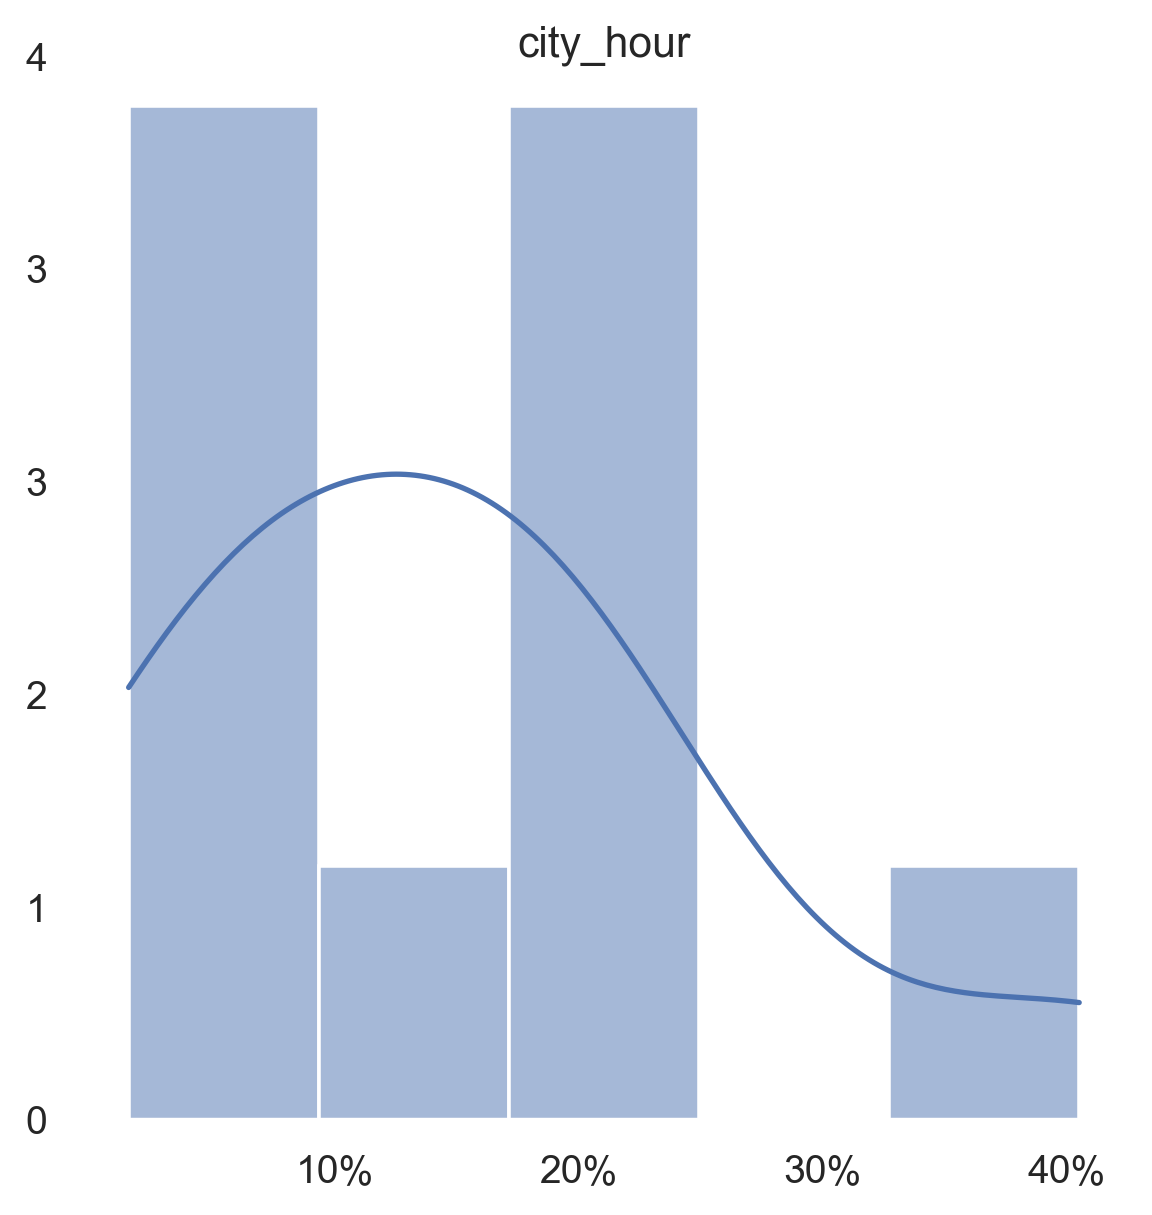

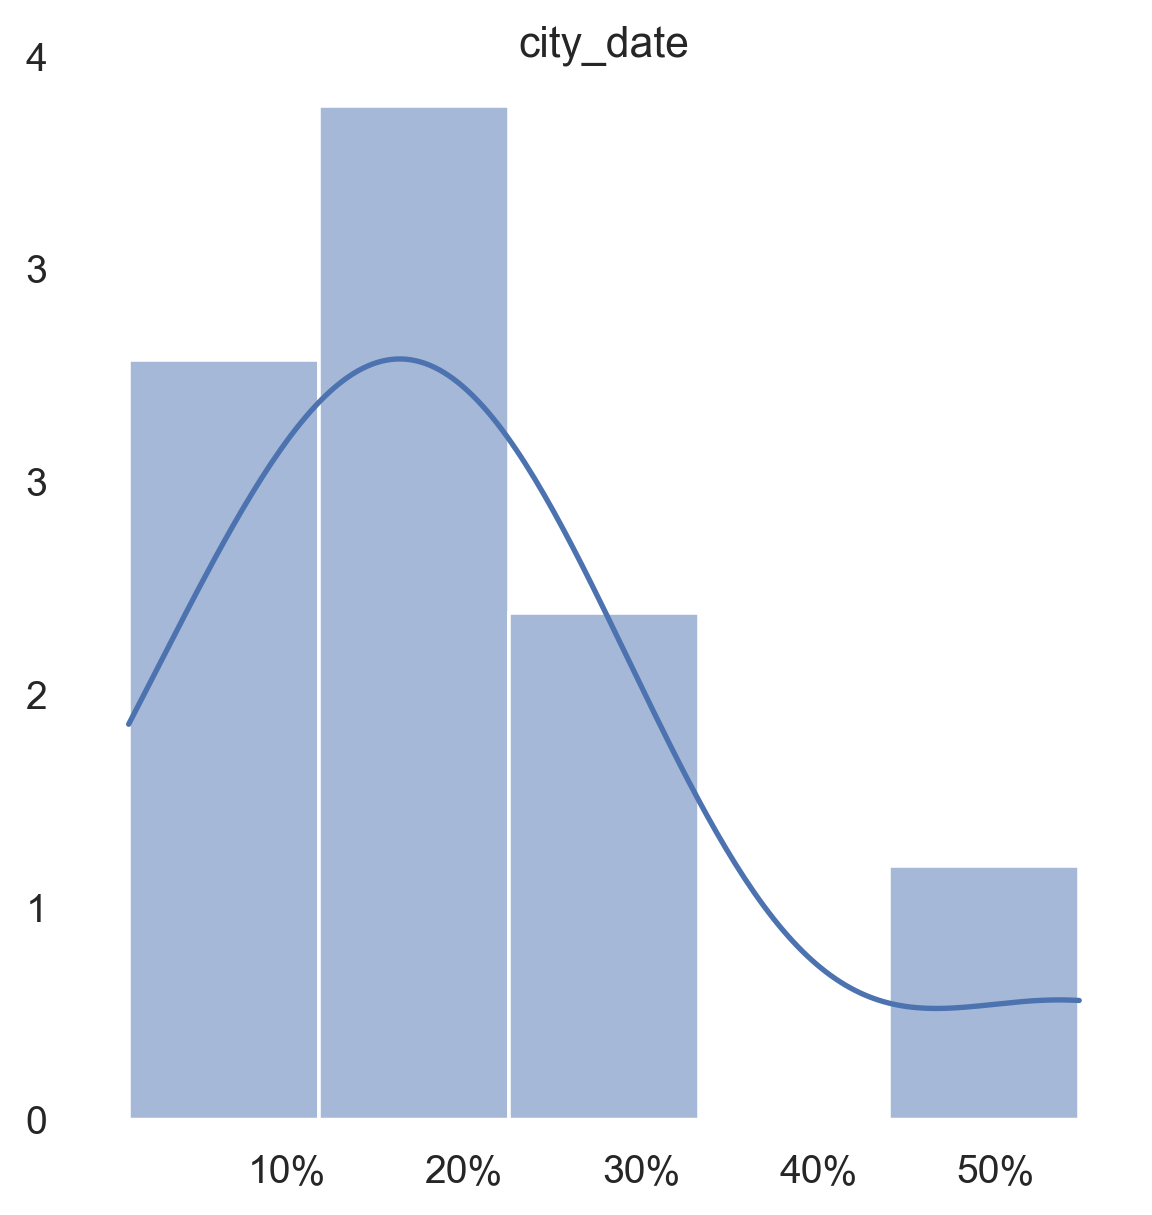

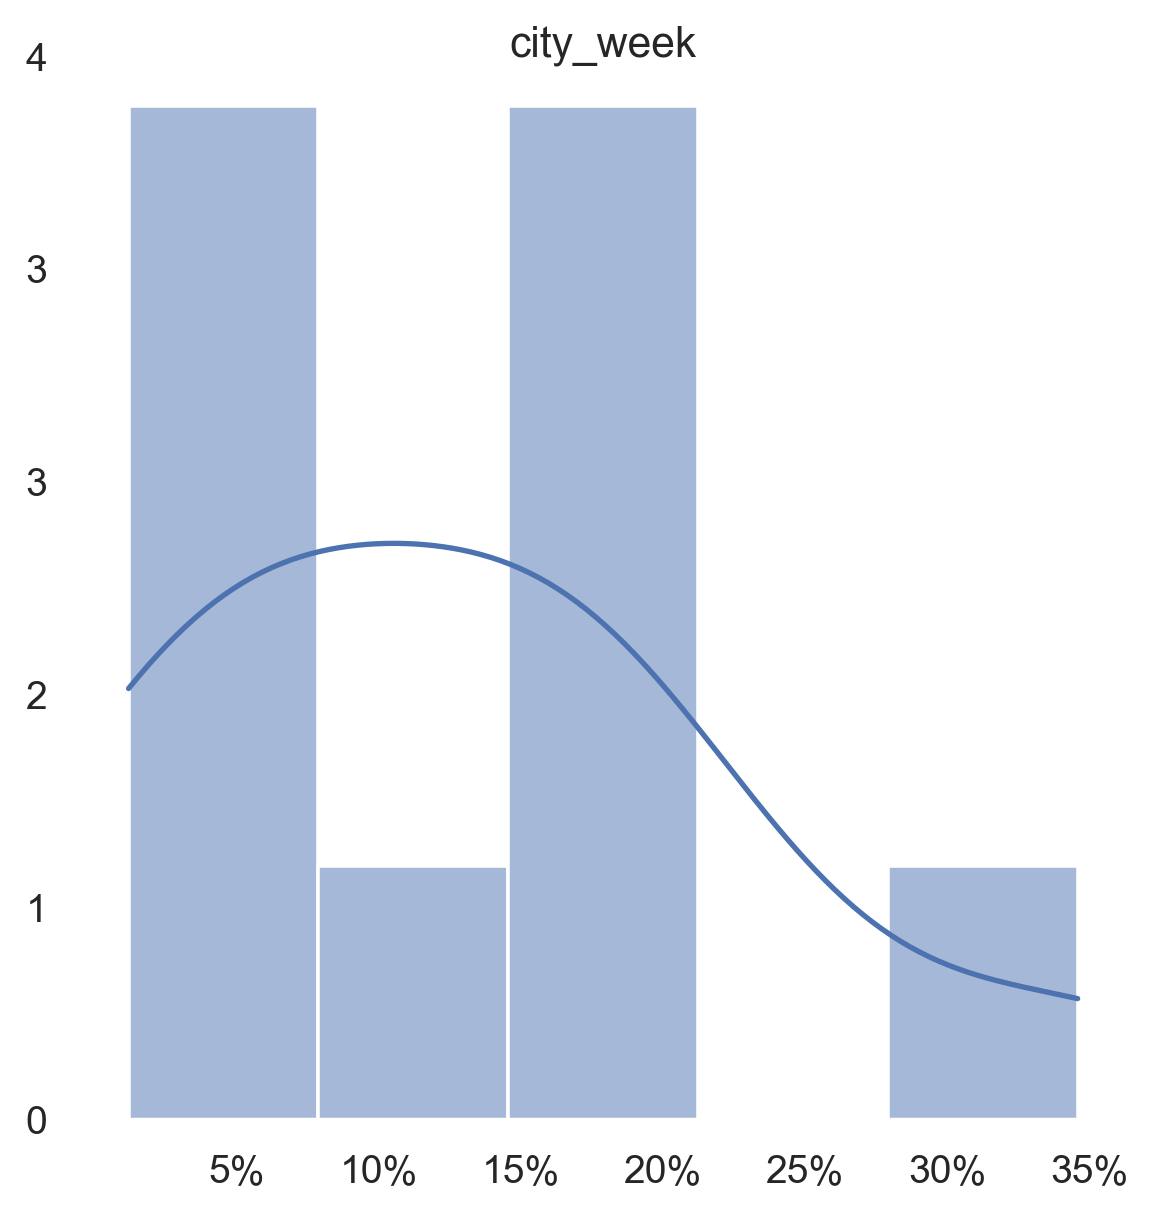

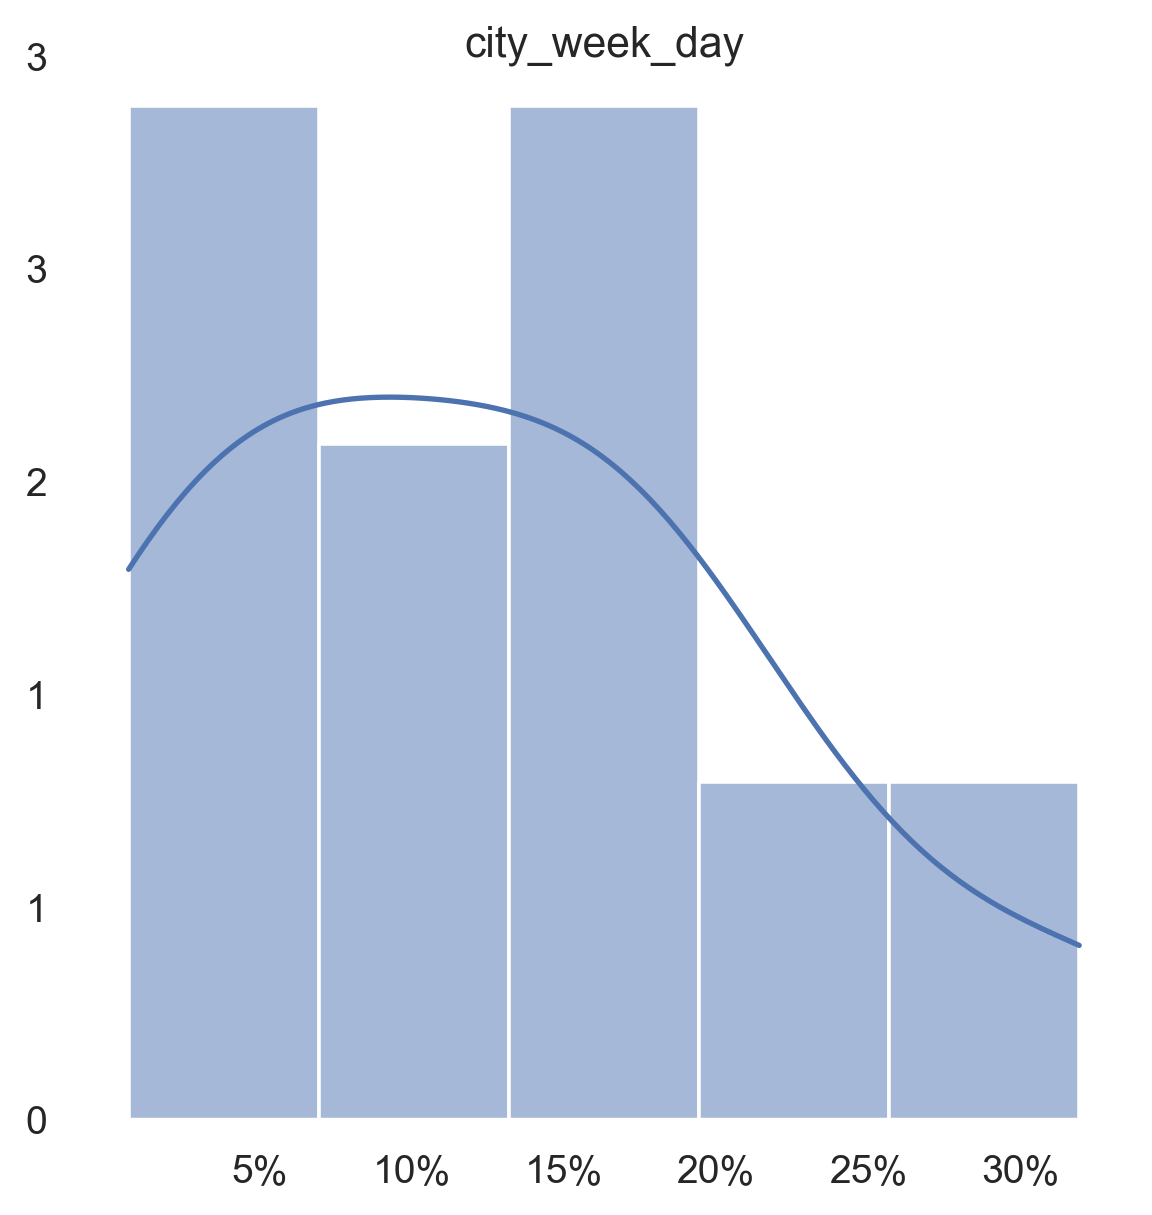

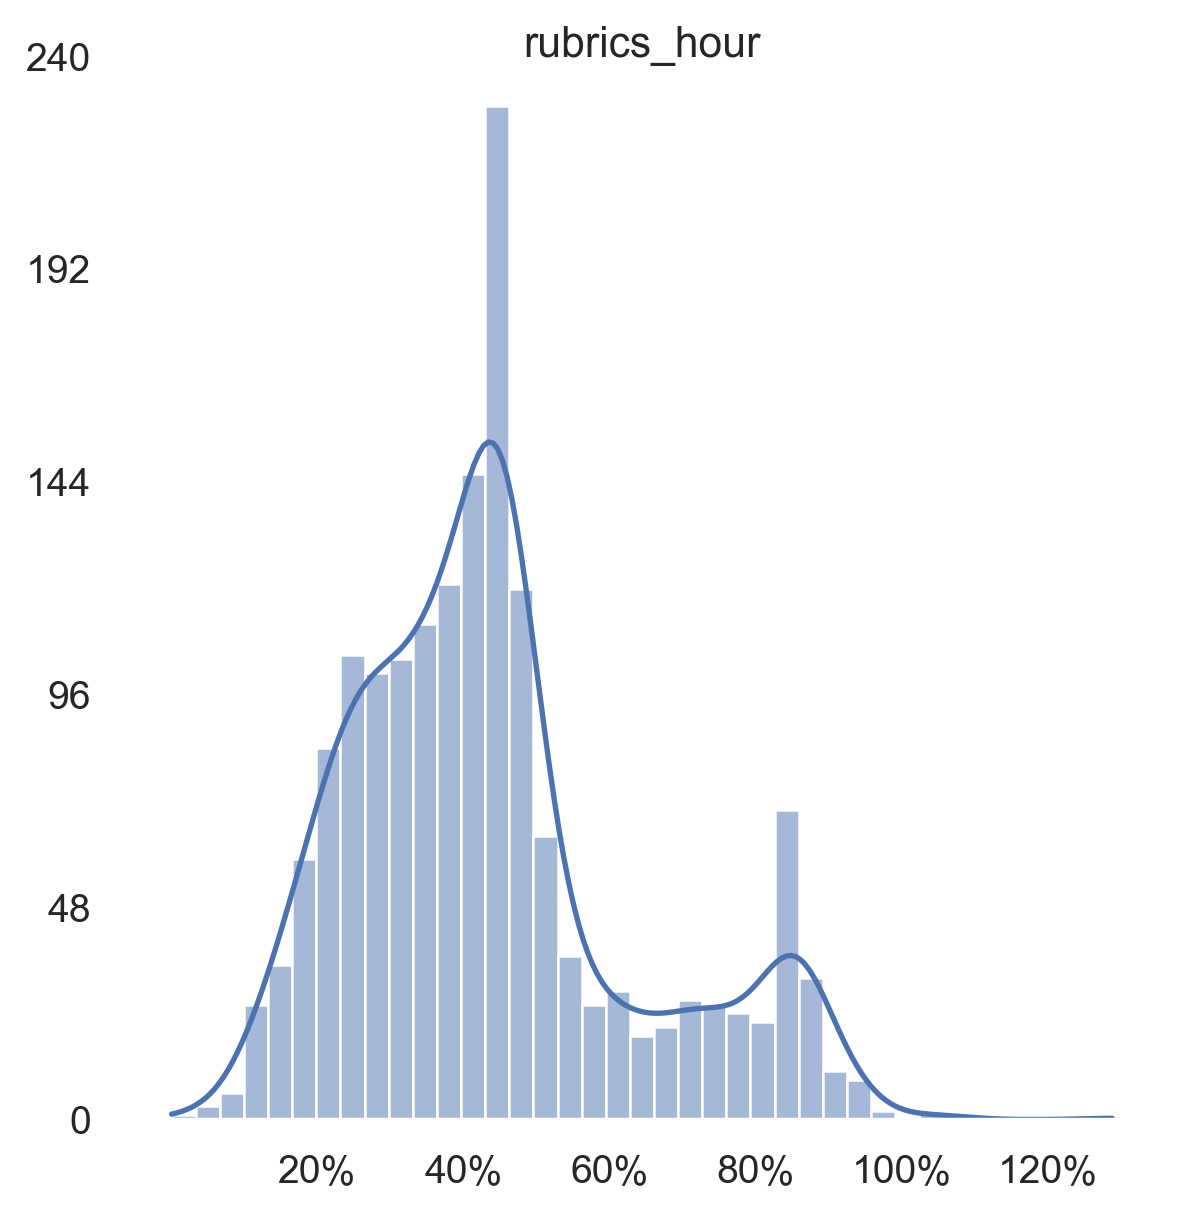

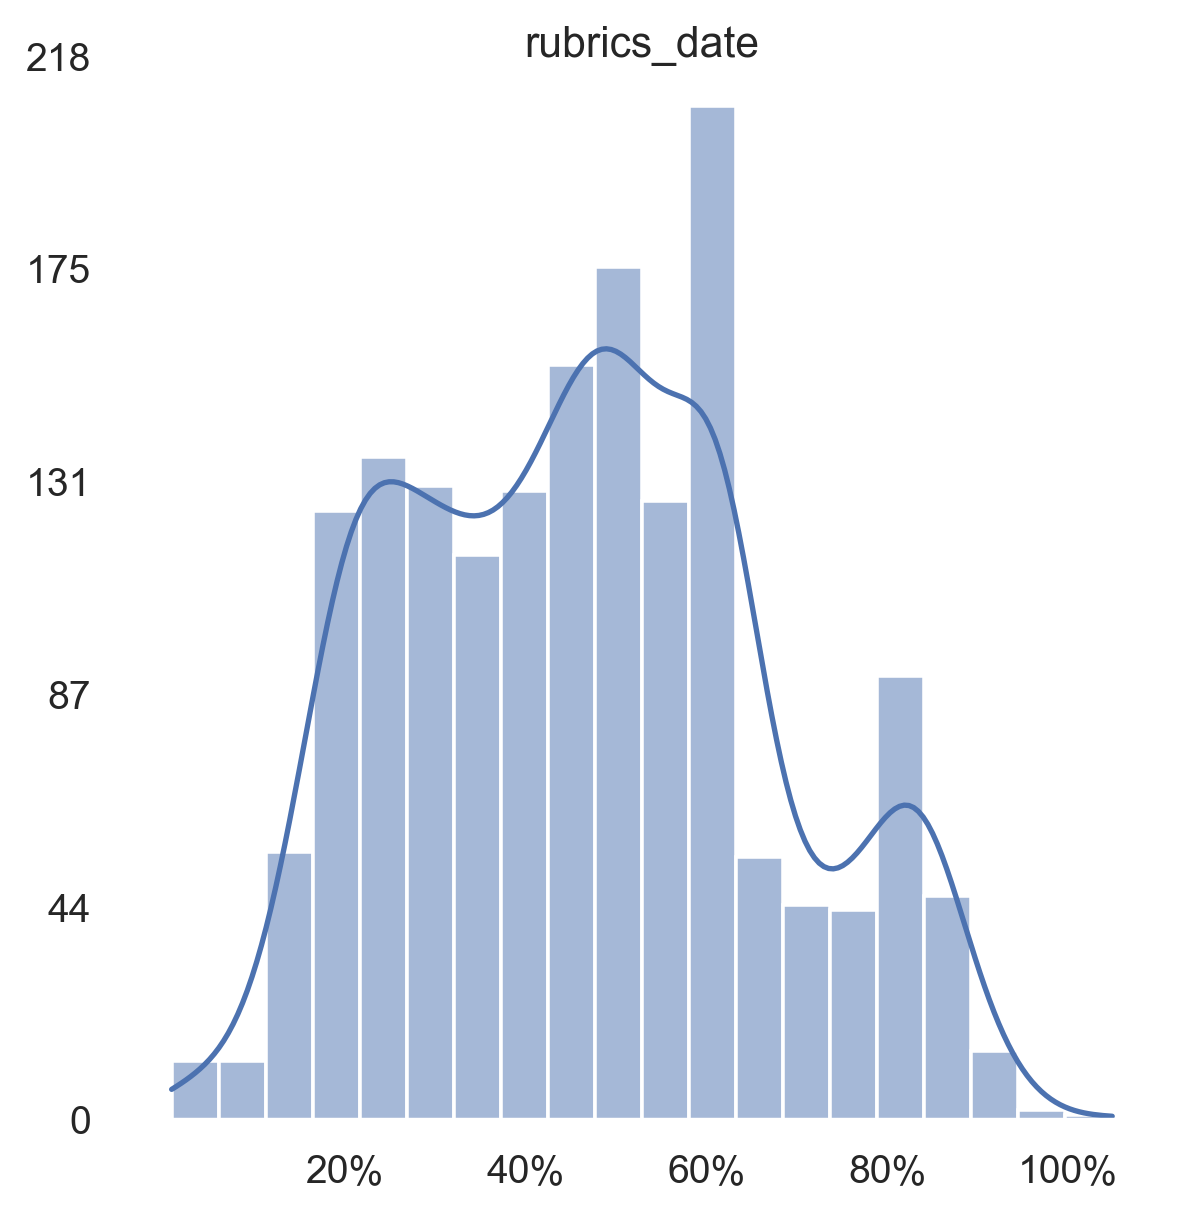

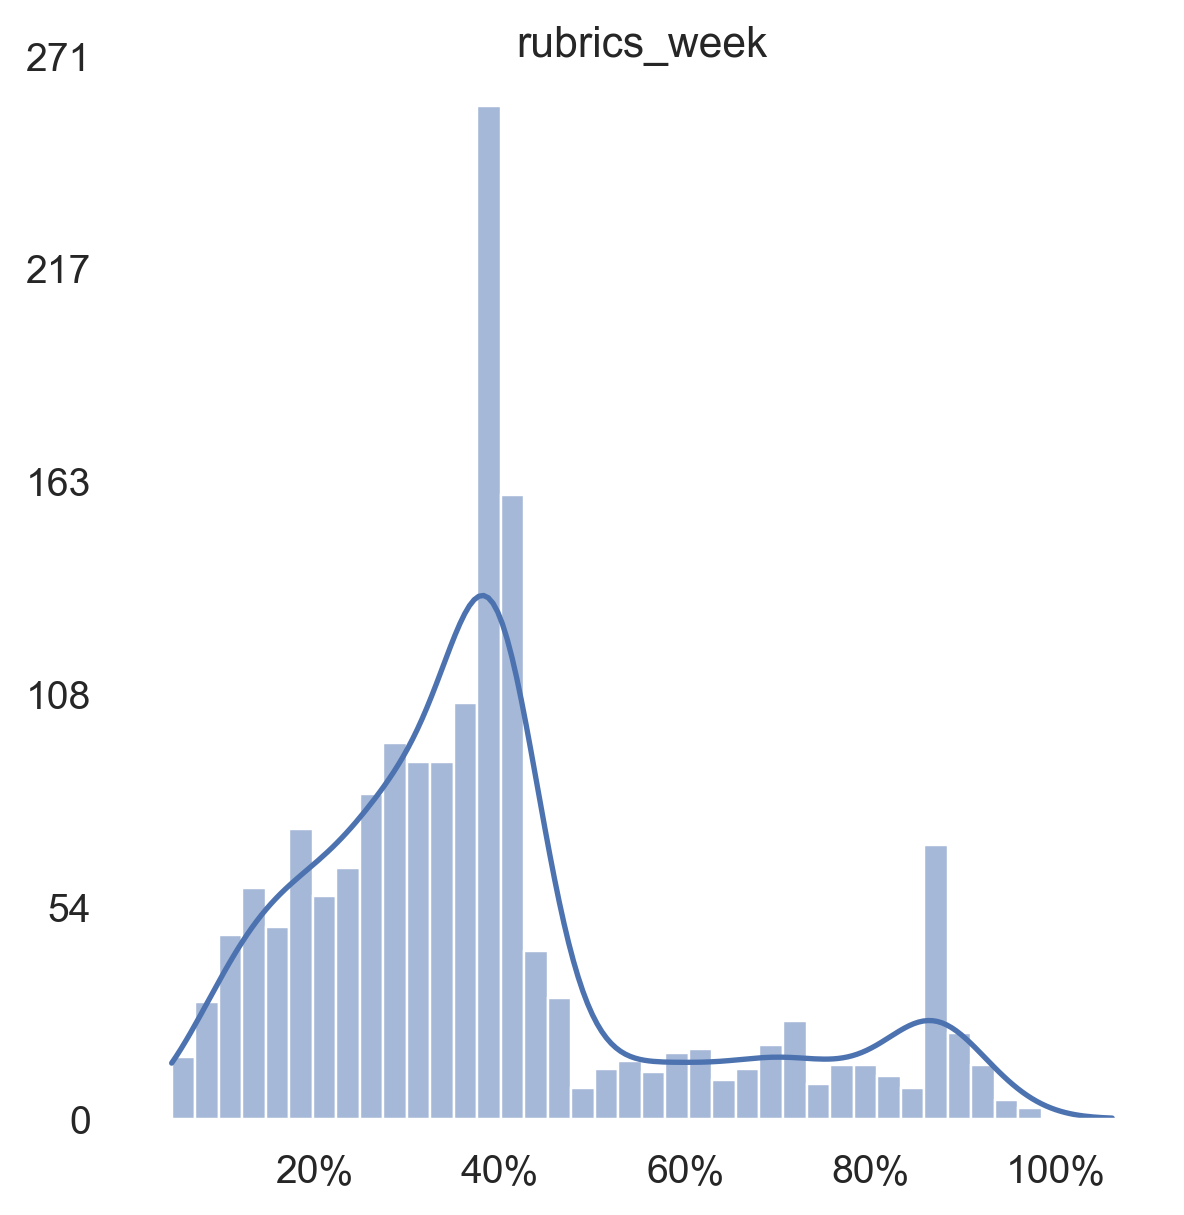

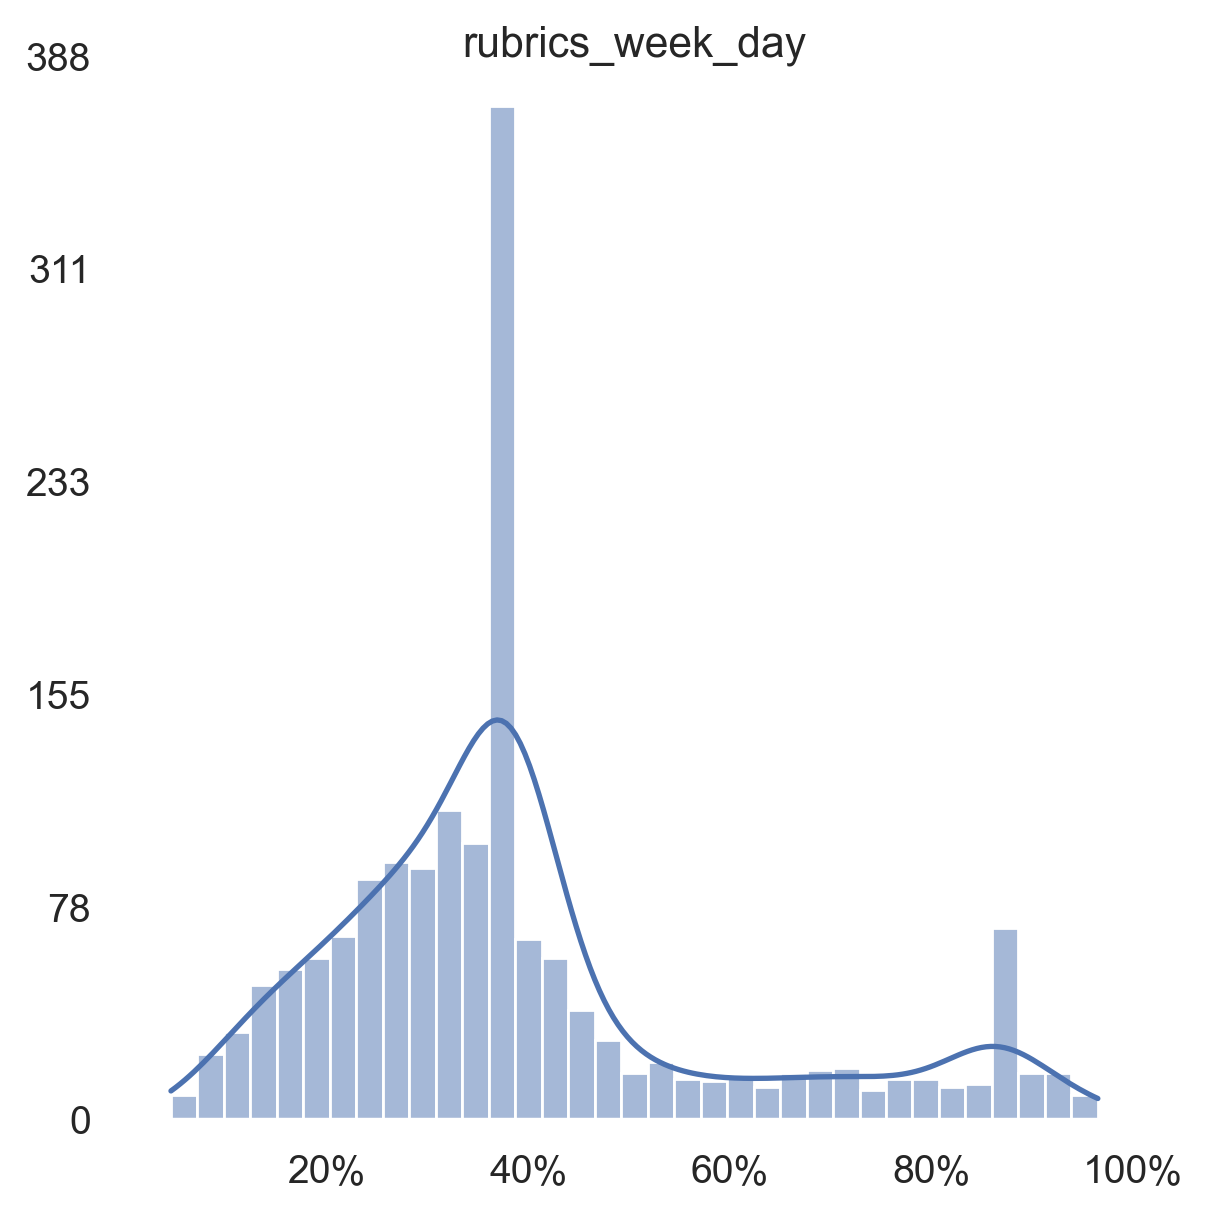

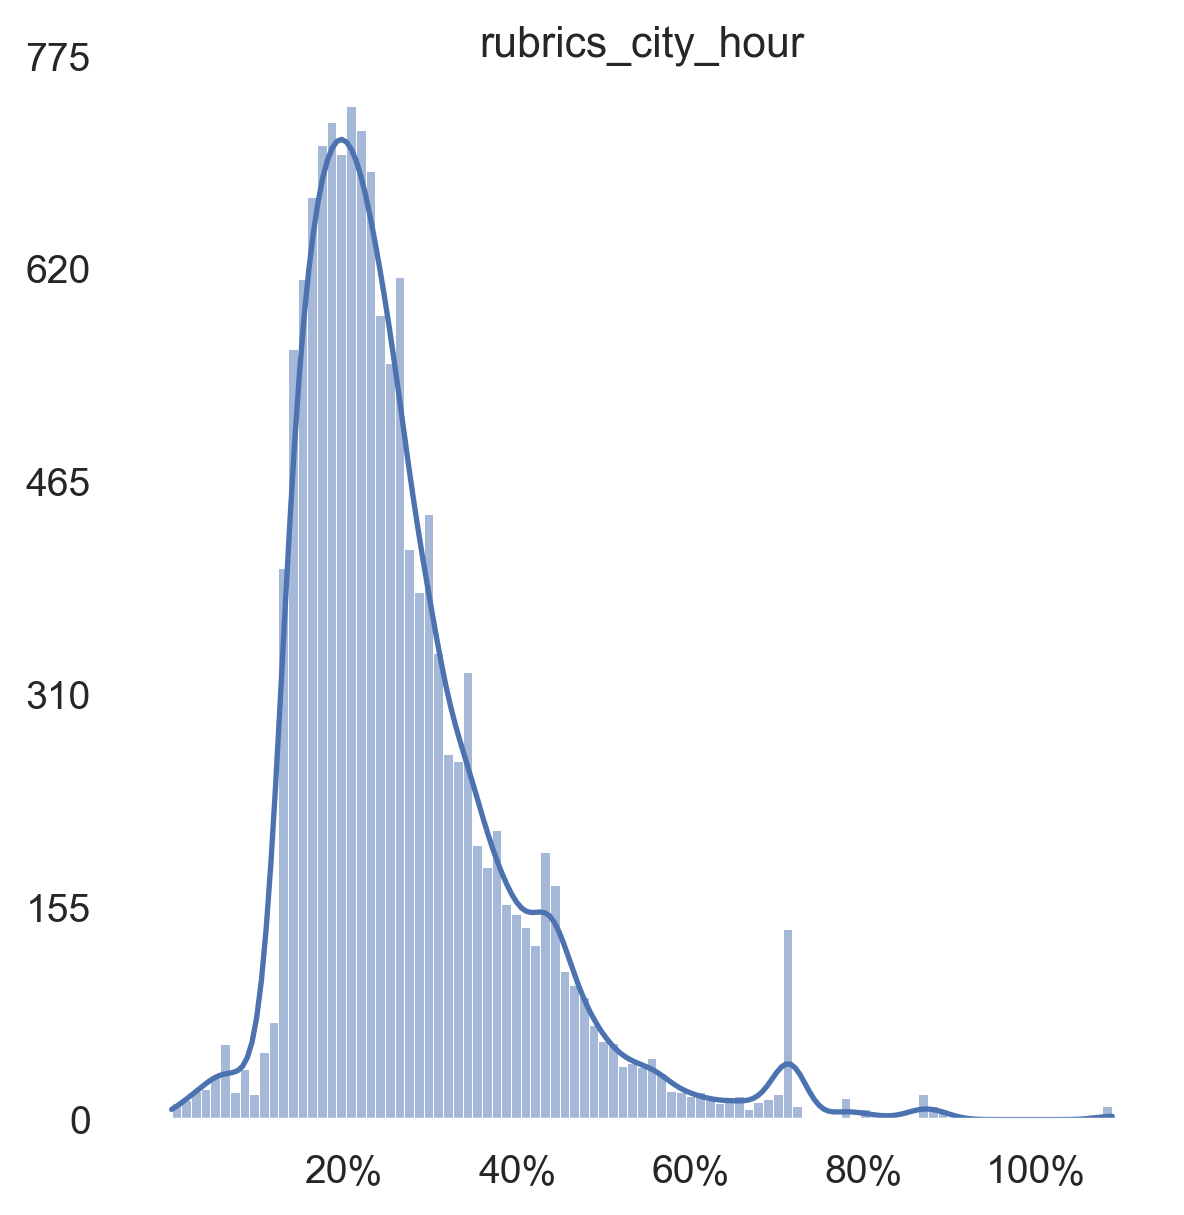

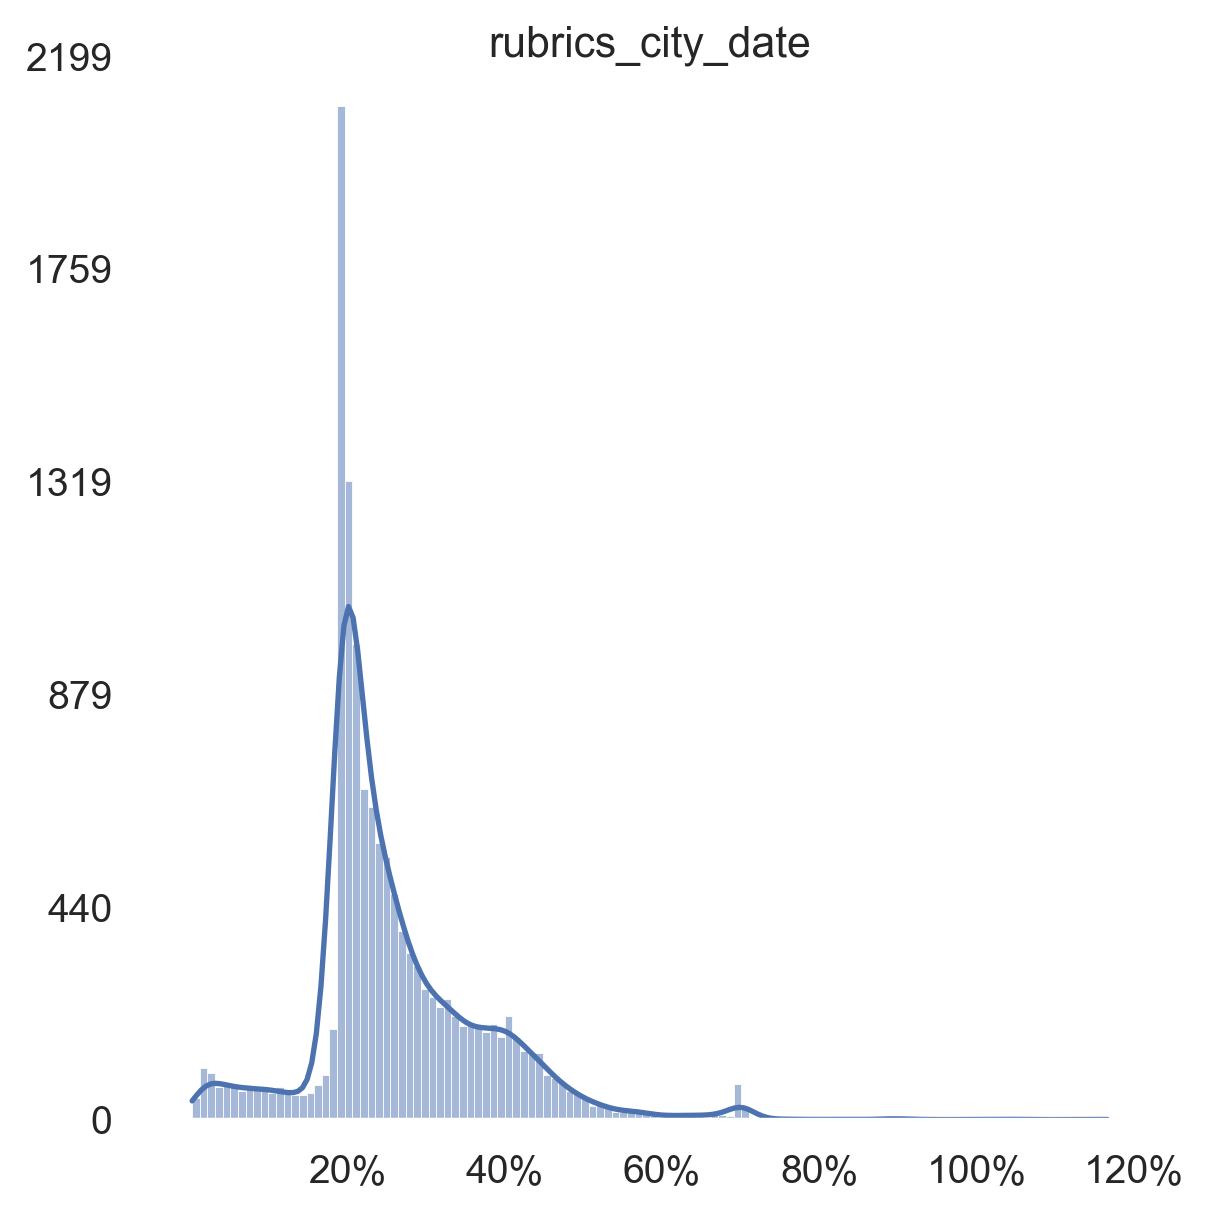

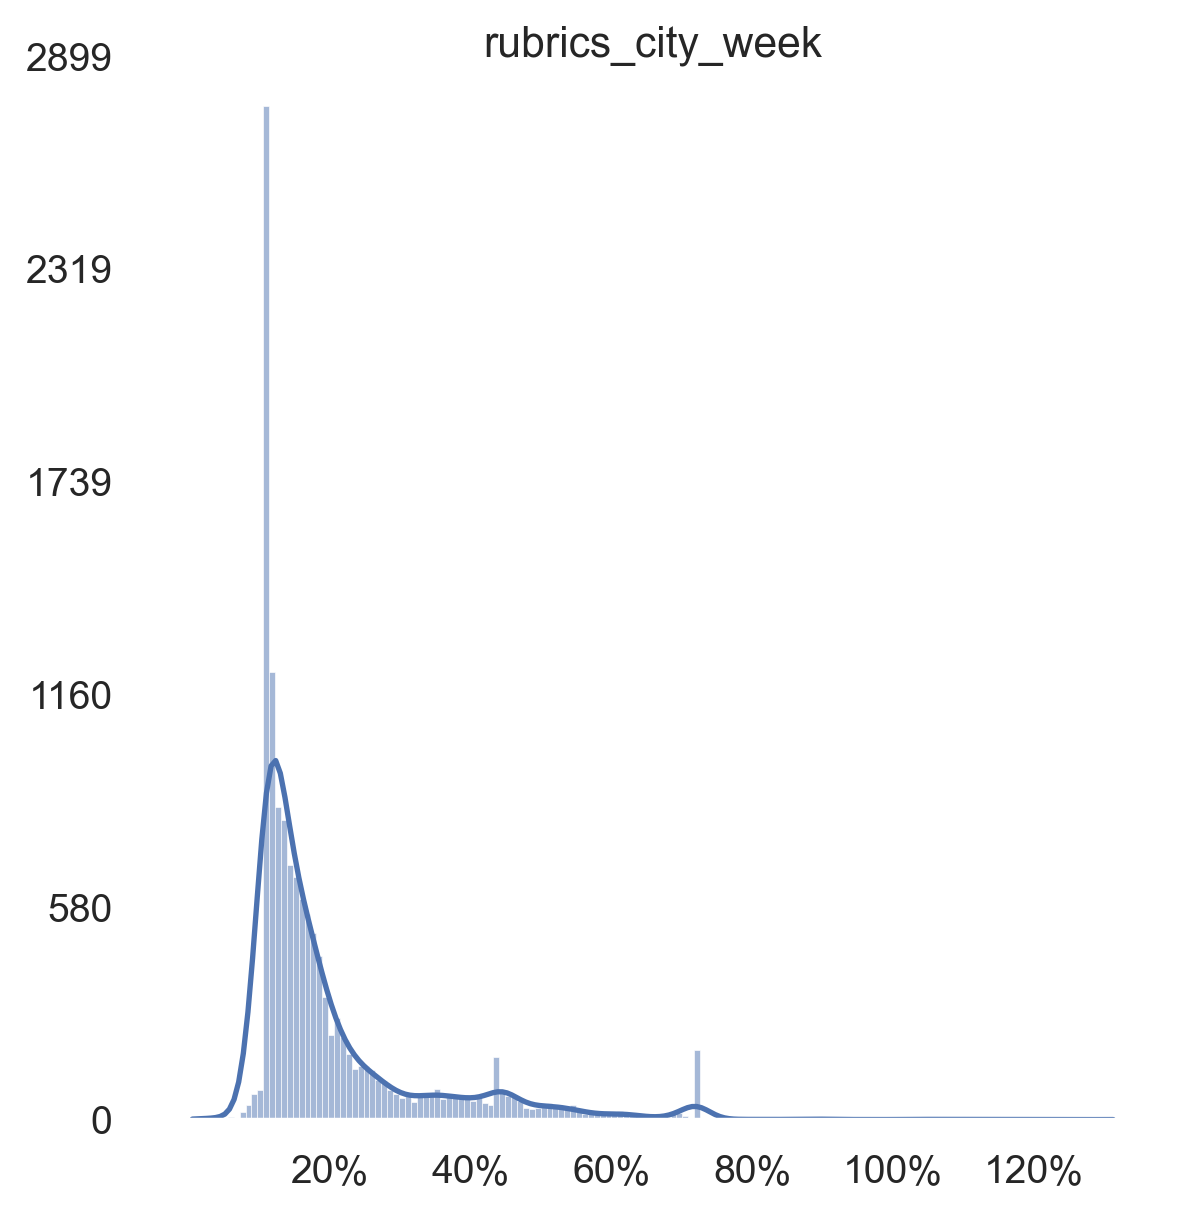

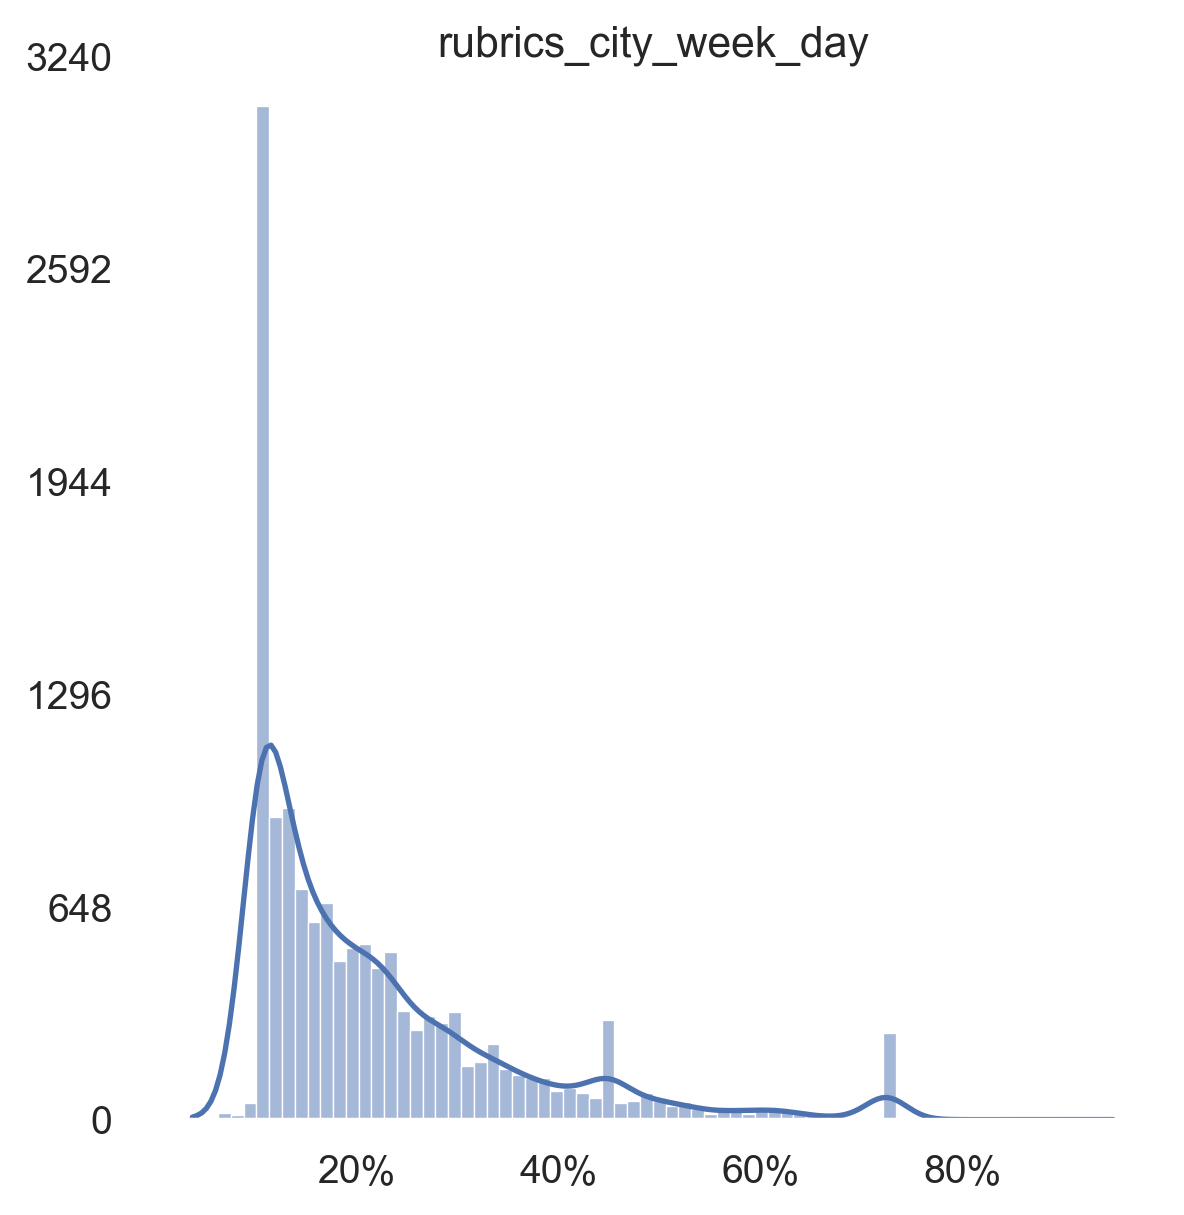

In [102]:
def rounder(x,y):
    return str(round(x))

def prcnter(x,y):
    if x == 0:
        return ''
    return str(round(x*100)) + '%'

i = 0

for file in dates:
    for col_r in ['hour_r', 'date_r', 'week_r', 'week_day_r']:
        xr = pd.read_excel(file, sheet_name=col_r)
        file_name = file.split('\\')[-1].replace('.xlsx','').replace('df_dates_','')
        sns_plot = sns.displot(data=xr, x="diff", kde=True)
        sns.set(rc={'figure.figsize':(6.89,4.25), "figure.dpi": 2**8})
        sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
        fpath = Path(mpl.get_data_path(), r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\arialnarrow.ttf")
        fig = sns_plot.figure
        ax = sns_plot.ax
        ax.yaxis.set_major_formatter(FuncFormatter(rounder))
        ax.xaxis.set_major_formatter(FuncFormatter(prcnter))
        ax.yaxis.set_major_locator(ticker.LinearLocator(numticks=6))
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title(f'{file_name}_{col_r}'.replace('_r',''), y=0.98)
        
        i+=1
        fig.savefig(f"pictures/ten_city/displot_{i:02}.png")

# Матрицы

### 1.9.	Анализ Матриц BCG по видам бизнеса

In [371]:
def plot_matrix(file, city, cnt_graphics=50, cnt_shars=12, step=1, size_x=6.89*4, size_y=4.25*4, font_size=16, img_w=17.5, img_h=10.8, blank=False, word_sample='files/report.docx'):
    shar_nums = list(range(1,16))*500
    start_range = 1
    stop_range = cnt_shars*step+1
    time = str(datetime.datetime.now())[2:16].replace('-','').replace(' ','_').replace(':','')
    print(f'files/{city}/{city}_shars_{time}.docx')
    df_list = []
    
    for graphic_num in tqdm(range(cnt_graphics)):
        shar_num = shar_nums.pop()

        df = pd.read_excel(file)[['Рубрика','Запросы 2022', 'Запросы 2023', 'Запросы, итого']].iloc[range(start_range, stop_range, step)].set_index('Рубрика').fillna(0)
        start_range = stop_range
        stop_range = (graphic_num+2)*cnt_shars*step+1

        df['Запросы, итого'] = (df['Запросы, итого'] - min(df['Запросы, итого'])) / (max(df['Запросы, итого']) - min(df['Запросы, итого']))*300
        requests_total = pd.read_excel(file)['Запросы 2023'].sum()
        df['Рост/Падение, %'] = df['Запросы 2023'] / df['Запросы 2022']
        df['Доля рынка, %'] = df['Запросы 2023'] / requests_total
        x = (df['Доля рынка, %'])
        y = (df['Рост/Падение, %'])
        sizes = (df['Запросы, итого']/1000)
        x_avg = (x.min()+x.max())/2
        y_avg = (y.min()+y.max())/2
        xi, yi = df['Доля рынка, %'], df['Рост/Падение, %']
        df.loc[(xi > x_avg) & (yi > y_avg), 'group'] = 'Звёзды:'
        df.loc[(xi > x_avg)  & (yi <= y_avg), 'group'] = 'Коровы:'
        df.loc[(xi <= x_avg)  & (yi > y_avg), 'group'] = 'Дети:'
        df.loc[(xi <= x_avg)  & (yi <= y_avg), 'group'] = 'Собаки:'
        df = df.sort_values(['Доля рынка, %', 'Рост/Падение, %'], ascending=[False, False])

        plt.rcParams['figure.figsize'] = size_x, size_y
        plt.rcParams['figure.dpi'] = 2**8
        plt.rcParams['font.size'] = '18'
        fpath = Path(mpl.get_data_path(), r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\arialnarrow.ttf")
        fig, ax = plt.subplots()
        ax.scatter(x, y, sizes, c='#C0504D', alpha=0.7)

        n = 0.02
        m = 0.02
        ax.set_ylim(ax.get_ylim()[0] * (1 - n), ax.get_ylim()[1] * (1 + n))
        ax.set_xlim(ax.get_xlim()[0] * (1 - m), ax.get_xlim()[1] * (1 + m))
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        plt.tick_params(bottom = False, left=False)

        for xi, yi, rubric, size in zip(x, y, x.index, sizes):
            rs = rubric.split(' ')
            if len(rs) > 1:
                rsl = len(rs) // 2
                rubric = ' '.join(rs[:rsl] + ['\n'] + rs[rsl:])

            shar_path = [r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\Шар_{:02}.png".format(shar_num)]
            shar_img = OffsetImage(plt.imread(shar_path[0], format="png"), zoom=size)
            ab = AnnotationBbox(shar_img, (xi, yi), frameon=False)
            ax.add_artist(ab)
            plt.annotate(rubric, (xi, yi), ha='center', va='center', font=fpath, color='#404040')

        ax.hlines((y.min()+y.max())/2, x.min(), x.max(), colors='gray', linewidth=1)
        ax.vlines((x.min()+x.max())/2, y.min(), y.max(), colors='gray', linewidth=1)
        
        im = plt.imread(r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\01_Logo_HSE_full_rus_PANTONE_for_dark_2.png")
        newax = fig.add_axes([0.1, 0.8, 0.1, 0.1], zorder=1, alpha=1)
        newax.imshow(im)
        newax.axis('off')
        fig.savefig(f'pictures/{city}_shar_{shar_num}.png', bbox_inches='tight', transparent=False)
        
        txt = ''
        for cat in ['Звёзды:','Коровы:','Дети:','Собаки:']:
            txt +=  cat + ' ' + ', '.join([word[::-1].replace('/', 'и', 1)[::-1].replace('/', ',').replace(' ,', ',').lower() for word in df[df['group'] == cat].index]) + "\n"
        txt = txt[::-1].replace('\n',':', 1)[::-1]
        add_image(f'files/{city}/{city}_shars_{time}.docx', f'pictures/{city}_shar_{shar_num}.png', word=txt, img_w=img_w, img_h=img_h, blank=blank,word_sample=word_sample)
        #plt.show()
        plt.close()
        df_list.append(df)
    return pd.concat(df_list)

In [372]:
file = r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\10 городов\Мастер_таблица_2ГИС_10_городов_230419_1700_ext.xlsx"
city = 'ten_city'

In [374]:
x = plot_matrix(file, city, cnt_graphics=20, cnt_shars=12, step=1, size_x=6.3*4, size_y=3.94*4, font_size=28, img_w=16.5, img_h=10, blank=True, word_sample='files/report_ten_city.docx')

files/ten_city/ten_city_shars_230505_0114.docx


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:47<00:00,  8.39s/it]


### 1.10.	Анализ Матриц BCG по городам

In [378]:
def plot_matrix_cities(cnt_graphics=100, show=False, size_x=6.89*4, size_y=4.25*4, font_size=16, img_w=17.5, img_h=10.8, blank=False, word_sample='files/report.docx'):
    folder='ten_city'
    shar_nums = list(range(1,16))*500
    time = str(datetime.datetime.now())[2:16].replace('-','').replace(' ','_').replace(':','')
    print(f'files/{folder}/{folder}_shars_{time}.docx')
    df_src = pd.read_parquet(f'files/ten_city/requests_for_shars')
    df_new = df_src[['rubricName','city']].drop_duplicates().set_index(['rubricName','city'])
    df_new['Запросы 2020'] = df_src[df_src['year_r'] == 2020].groupby(['rubricName', 'city']).sum('cnt_requests')[['cnt_requests']]
    df_new['Запросы 2021'] = df_src[df_src['year_r'] == 2021].groupby(['rubricName', 'city']).sum('cnt_requests')[['cnt_requests']]
    df_new['Запросы 2022'] = df_src[df_src['year_r'] == 2022].groupby(['rubricName', 'city']).sum('cnt_requests')[['cnt_requests']]
    df_new['Запросы 2023'] = df_src[df_src['year_r'] == 2023].groupby(['rubricName', 'city']).sum('cnt_requests')[['cnt_requests']]
    df_new = df_new.fillna(0).astype(int)
    df_new['Запросы, итого'] =  df_new['Запросы 2020'] + df_new['Запросы 2021'] + df_new['Запросы 2022'] + df_new['Запросы 2023']
    df_new = df_new.reset_index().set_index('city')

    rubrics = dd.read_parquet(f"files/ten_city/df_tx_grouped_filtered_ten_city")['rubricName'].unique().compute()
    rubrics = [i for i in rubrics.to_dict().values()]
    df_list = []
    
    for rubric in tqdm(rubrics[:cnt_graphics]):
        shar_num = shar_nums.pop()
        df = df_new.loc[df_new['rubricName']==rubric]
        df['Запросы, итого'] = (df['Запросы, итого'] - min(df['Запросы, итого'])) / (max(df['Запросы, итого']) - min(df['Запросы, итого']))*300
        requests_total = df_new['Запросы 2023'].sum()
        df['Рост/Падение, %'] = df['Запросы 2023'] / df['Запросы 2022']
        df['Доля рынка, %'] = df['Запросы 2023'] / requests_total
        x = (df['Доля рынка, %'])
        y = (df['Рост/Падение, %'])
        sizes = (df['Запросы, итого']/1000)
        x_avg = (x.min()+x.max())/2
        y_avg = (y.min()+y.max())/2
        xi, yi = df['Доля рынка, %'], df['Рост/Падение, %']
        df.loc[(xi > x_avg) & (yi > y_avg), 'group'] = 'Звёзды:'
        df.loc[(xi > x_avg)  & (yi <= y_avg), 'group'] = 'Коровы:'
        df.loc[(xi <= x_avg)  & (yi > y_avg), 'group'] = 'Дети:'
        df.loc[(xi <= x_avg)  & (yi <= y_avg), 'group'] = 'Собаки:'
        df = df.sort_values(['Доля рынка, %', 'Рост/Падение, %'], ascending=[False, False])

        plt.rcParams['figure.figsize'] = size_x, size_y
        plt.rcParams['figure.dpi'] = 2**8
        plt.rcParams['font.size'] = '18'
        fpath = Path(mpl.get_data_path(), r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\arialnarrow.ttf")
        fig, ax = plt.subplots()
        ax.scatter(x, y, sizes, c='#C0504D', alpha=0.7)

        n = 0.02
        m = 0.02
        ax.set_ylim(ax.get_ylim()[0] * (1 - n), ax.get_ylim()[1] * (1 + n))
        ax.set_xlim(ax.get_xlim()[0] * (1 - m), ax.get_xlim()[1] * (1 + m))
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        plt.tick_params(bottom = False, left=False)
        plt.title(rubric, font=fpath, fontsize=40, fontweight=1000)

        for xi, yi, city, size in zip(x, y, x.index, sizes):
            rs = city.split(' ')
            if len(rs) > 1:
                rsl = len(rs) // 2
                city = ' '.join(rs[:rsl] + ['\n'] + rs[rsl:])

            shar_path = [r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\Шар_{:02}.png".format(shar_num)]
            shar_img = OffsetImage(plt.imread(shar_path[0], format="png"), zoom=size)
            ab = AnnotationBbox(shar_img, (xi, yi), frameon=False)
            ax.add_artist(ab)
            plt.annotate(city, (xi, yi), ha='center', va='center', font=fpath, color='#404040')

        ax.hlines((y.min()+y.max())/2, x.min(), x.max(), colors='gray', linewidth=1)
        ax.vlines((x.min()+x.max())/2, y.min(), y.max(), colors='gray', linewidth=1)
        
        im = plt.imread(r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\01_Logo_HSE_full_rus_PANTONE_for_dark_2.png")
        newax = fig.add_axes([0.1, 0.8, 0.1, 0.1], zorder=1, alpha=0.5)
        newax.imshow(im)
        newax.axis('off')
        fig.savefig(f'pictures/{folder}_shar_{shar_num}.png', bbox_inches='tight', transparent=False)
        
        txt = f'{rubric} '
        for cat in ['Звёзды:','Коровы:','Дети:','Собаки:']:
            txt +=  cat + ' ' + ', '.join([word[::-1].replace('/', 'и', 1)[::-1].replace('/', ',').replace(' ,', ',') for word in df[df['group'] == cat].index]) + "\n"
        txt = txt[::-1].replace('\n',':', 1)[::-1]
        add_image(f'files/{folder}/{folder}_shars_{time}.docx', f'pictures/{folder}_shar_{shar_num}.png', word=txt, img_w=img_w, img_h=img_h, blank=blank,word_sample=word_sample)
        #plt.show()
        plt.close()
        df_list.append(df)
    return pd.concat(df_list)

In [ ]:
plot_matrix_cities(cnt_graphics=90, size_x=6.3*4, size_y=3.94*4, font_size=28, img_w=16.5, img_h=10, blank=False, word_sample='files/report_ten_city.docx')

### 1.11.	Анализ Матриц BCG по городам и бизнесам

In [2]:
def plot_matrix_rubric_cities(cnt_graphics=100, show=False, size_x=6.89*4, size_y=4.25*4, font_size=16, img_w=17.5, img_h=10.8, blank=False, word_sample='files/report.docx'):
    folder='ten_city'
    shar_nums = list(range(1,16))*500
    time = str(datetime.datetime.now())[2:16].replace('-','').replace(' ','_').replace(':','')
    print(f'files/{folder}/{folder}_shars_{time}.docx')
    df_src = pd.read_parquet(f'files/ten_city/requests_for_shars')
    df_src = pd.read_parquet(f'files/ten_city/requests_for_shars')
    df_new = df_src[['rubricName','city']].drop_duplicates().set_index(['rubricName','city'])
    df_new['Запросы 2020'] = df_src[df_src['year_r'] == 2020].groupby(['rubricName', 'city']).sum('cnt_requests')[['cnt_requests']]
    df_new['Запросы 2021'] = df_src[df_src['year_r'] == 2021].groupby(['rubricName', 'city']).sum('cnt_requests')[['cnt_requests']]
    df_new['Запросы 2022'] = df_src[df_src['year_r'] == 2022].groupby(['rubricName', 'city']).sum('cnt_requests')[['cnt_requests']]
    df_new['Запросы 2023'] = df_src[df_src['year_r'] == 2023].groupby(['rubricName', 'city']).sum('cnt_requests')[['cnt_requests']]
    df_new = df_new.fillna(0).astype(int)
    df_new['Запросы, итого'] =  df_new['Запросы 2020'] + df_new['Запросы 2021'] + df_new['Запросы 2022'] + df_new['Запросы 2023']
    df_new = df_new.reset_index()
    df_new['city_rubric'] = df_new['city'] + '.' + df_new['rubricName']
    df_new = df_new.set_index('city_rubric').sort_values('Запросы, итого', ascending=False)
    cnt_shars = 12
    step = 1
    rubrics = dd.read_parquet(f"files/ten_city/df_tx_grouped_filtered_ten_city")['rubricName'].unique().compute()
    rubrics = [i for i in rubrics.to_dict().values()]
    df_list = []
    start_range = 1
    stop_range = cnt_shars*step+1
    
    for graphic_num in tqdm(range(cnt_graphics)):
        shar_num = shar_nums.pop()
        
        df = df_new.iloc[range(start_range, stop_range, step)]
        start_range = stop_range
        stop_range = (graphic_num+2)*cnt_shars*step+1
        
        df['Запросы, итого'] = (df['Запросы, итого'] - min(df['Запросы, итого'])) / (max(df['Запросы, итого']) - min(df['Запросы, итого']))*300
        requests_total = df_new['Запросы 2023'].sum()
        df['Рост/Падение, %'] = df['Запросы 2023'] / df['Запросы 2022']
        df['Доля рынка, %'] = df['Запросы 2023'] / requests_total
        x = (df['Доля рынка, %'])
        y = (df['Рост/Падение, %'])
        sizes = (df['Запросы, итого']/1000)
        x_avg = (x.min()+x.max())/2
        y_avg = (y.min()+y.max())/2
        xi, yi = df['Доля рынка, %'], df['Рост/Падение, %']
        df.loc[(xi > x_avg) & (yi > y_avg), 'group'] = 'Звёзды:'
        df.loc[(xi > x_avg)  & (yi <= y_avg), 'group'] = 'Коровы:'
        df.loc[(xi <= x_avg)  & (yi > y_avg), 'group'] = 'Дети:'
        df.loc[(xi <= x_avg)  & (yi <= y_avg), 'group'] = 'Собаки:'
        df = df.sort_values(['Доля рынка, %', 'Рост/Падение, %'], ascending=[False, False])

        plt.rcParams['figure.figsize'] = size_x, size_y
        plt.rcParams['figure.dpi'] = 2**8
        plt.rcParams['font.size'] = '18'
        fpath = Path(mpl.get_data_path(), r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\arialnarrow.ttf")
        fig, ax = plt.subplots()
        ax.scatter(x, y, sizes, c='#C0504D', alpha=0.7)

        n = 0.02
        m = 0.02
        ax.set_ylim(ax.get_ylim()[0] * (1 - n), ax.get_ylim()[1] * (1 + n))
        ax.set_xlim(ax.get_xlim()[0] * (1 - m), ax.get_xlim()[1] * (1 + m))
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        plt.tick_params(bottom = False, left=False)
        #plt.title(rubric, font=fpath, fontsize=40, fontweight=1000)

        for xi, yi, city, size in zip(x, y, x.index, sizes):
            rs = city.split(' ')
            if len(rs) > 1:
                rsl = len(rs) // 2
                city = ' '.join(rs[:rsl] + ['\n'] + rs[rsl:])

            shar_path = [r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\Шар_{:02}.png".format(shar_num)]
            shar_img = OffsetImage(plt.imread(shar_path[0], format="png"), zoom=size)
            ab = AnnotationBbox(shar_img, (xi, yi), frameon=False)
            ax.add_artist(ab)
            plt.annotate(city, (xi, yi), ha='center', va='center', font=fpath, color='#404040')

        ax.hlines((y.min()+y.max())/2, x.min(), x.max(), colors='gray', linewidth=1)
        ax.vlines((x.min()+x.max())/2, y.min(), y.max(), colors='gray', linewidth=1)
        
        
        im = plt.imread(r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\01_Logo_HSE_full_rus_PANTONE_for_dark_2.png")
        newax = fig.add_axes([0.1, 0.8, 0.1, 0.1], zorder=1, alpha=0.5)
        newax.imshow(im)
        newax.axis('off')
        fig.savefig(f'pictures/{folder}_shar_{shar_num}.png', bbox_inches='tight', transparent=False)
        
        txt = f''
        for cat in ['Звёзды:','Коровы:','Дети:','Собаки:']:
            txt +=  cat + ' ' + ', '.join([word[::-1].replace('/', 'и', 1)[::-1].replace('/', ',').replace(' ,', ',') for word in df[df['group'] == cat].index]) + "\n"
        txt = txt[::-1].replace('\n',':', 1)[::-1]
        add_image(f'files/{folder}/{folder}_shars_{time}.docx', f'pictures/{folder}_shar_{shar_num}.png', word=txt, img_w=img_w, img_h=img_h, blank=blank,word_sample=word_sample)
        if show:
            plt.show()
        plt.close()
        df_list.append(df)
    return pd.concat(df_list)

In [ ]:
df = plot_matrix_rubric_cities(cnt_graphics=90, size_x=6.3*4, size_y=3.94*4, font_size=28, img_w=16.5, img_h=10, blank=True, word_sample='files/report_ten_city.docx', show=False)

In [90]:
df.to_excel('files/ten_city/Таблица_2ГИС_Диплом_матрицы_бизнесы_города_230503_2245.xlsx')